# Final Project Submission

* Students names: Cody Freese/Fennec Nightingale/Thomas Cornett
* Student pace: Part time
* Instructor name: Amber Yandow
* Blog post URL:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

# OBTAIN

## Import tools

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import zscore
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## King County dataset

In [76]:
# read data
kc_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 
              'sqft_basement', 'yr_built']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 
             'floors': float, 'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 
             'yr_built': int, 'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float}

kc_data = pd.read_csv('kc_house_data.csv', dtype = kc_dtypes, parse_dates = ['date'])

kc_data['sqft_basement'] = kc_data['sqft_basement'].replace({'?': 0})
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(dtype=float, errors='ignore')

In [77]:
#drop unnessecary columns and fix data
kc_data = kc_data.drop('sqft_living15', 1).drop('sqft_lot15', 1)

#look for outliers, in bedrooms, we can clearly see a single outlier, for other columns, filtering by z score will be easiest 
kc_data[kc_data['bedrooms'] == 33]
# wouldn't be realistic for a house with 33 bedrooms to only have a sqft_living of 1620 and only 1 3/4 bathrooms so it looks like a typo
# will adjust to 3 
kc_data[kc_data['bedrooms'] == 33] = kc_data[kc_data['bedrooms'] == 33].replace(33,3)

In [78]:
#setting waterfront NaN values equal to the ratio of waterfront/non-waterfront properties, will want to try and narrow by zipcode 
#filling NaN with easily seperatable/changable values helpful 
kc_data['waterfront'] = kc_data['waterfront'].fillna(146/19221)
kc_data['view'] = kc_data['view'].fillna((957 + (508*2) + (330*3) + (317*4))/21534)
kc_data['yr_renovated'] = kc_data['yr_renovated'].fillna(0)

In [79]:
#Convert to integer for whole number year
kc_data['yr_renovated'] = kc_data['yr_renovated'].astype('int')

# SCRUB

## Dataframe Info

In [80]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int32
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int32
bathrooms        21597 non-null float64
sqft_living      21597 non-null int32
sqft_lot         21597 non-null int32
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null float64
grade            21597 non-null int32
sqft_above       21597 non-null int32
sqft_basement    21597 non-null float64
yr_built         21597 non-null int32
yr_renovated     21597 non-null int32
zipcode          21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
dtypes: datetime64[ns](1), float64(10), int32(8)
memory usage: 2.5 MB


## Check for NaN

In [81]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Drop Null Values

In [82]:
#Drop NaN
kc_data = df.copy()
kc_data = df_renovated.dropna()
kc_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125.0,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074.0,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0,98053.0,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0,98003.0,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0,98116.0,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0,98103.0,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0,98146.0,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0,98144.0,47.5944,-122.299,1020,2007


## Convert Year Renovated to Integer

In [83]:
#Ensuring no strings in yr_renovated
#df_renovated['yr_renovated'] = df_renovated['yr_renovated'].astype('float')
#Convert to integer for whole number year
#df_renovated['yr_renovated'] = df_renovated['yr_renovated'].astype('int')
#Convert Zipcode to Float
#df_renovated['zipcode'] = df_renovated['zipcode'].astype('float')
#Convert Condition to float
#df_renovated['condition'] = df_renovated['condition'].astype('float')

## Renovated Info

In [95]:
df_renovated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null float64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null int32
zipcode          15762 non-null float64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(9), int32(1), int64(9), object(2)
memory usage: 2.6+ MB


## Datetime

In [85]:
#df_renovated['date'] = pd.to_datetime(df_renovated['date'])
#df_renovated['date']

## For Loop - Value Counts

In [86]:
for col in df_renovated.columns:
    try:
        print(col, df_renovated[col].value_counts()[:5])
    except:
        print(col, df_renovated[col].value_counts())
    print('\n')

id 6632900574    2
9353300600    2
5101402435    2
722039087     2
1523049207    2
Name: id, dtype: int64


date 6/25/2014    103
6/23/2014    102
7/14/2014     93
7/8/2014      93
4/28/2015     93
Name: date, dtype: int64


price 350000.0    129
450000.0    120
500000.0    115
550000.0    113
425000.0    111
           ... 
275053.0      1
763101.0      1
438900.0      1
959750.0      1
311300.0      1
Name: price, Length: 3034, dtype: int64


bedrooms 3    7120
4    5079
2    2003
5    1183
6     192
Name: bedrooms, dtype: int64


bathrooms 2.50    4004
1.00    2761
1.75    2226
2.25    1487
2.00    1395
1.50    1060
2.75     853
3.00     543
3.50     543
3.25     428
3.75     104
4.00     100
4.50      75
4.25      62
0.75      50
4.75      17
5.00      14
Name: bathrooms, dtype: int64


sqft_living 1820    102
1440    100
1400     97
1300     95
1320     94
Name: sqft_living, dtype: int64


sqft_lot 5000    277
6000    204
4000    177
7200    151
4800     89
Name: sqft_lot, dtype: 

## Check for duplicates

In [87]:
duplicates = df_renovated[df_renovated.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## Value Counts

In [88]:
# Value counts for variables
for col in df_renovated.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

## Function on Variables

In [89]:
def check_column(df_renovated, col_name, n_unique=10):
    print('Datatype')
    print('\t',df_renovated[col_name].dtypes)
    
    num_nulls = df_renovated[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df_renovated[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df_renovated[col_name].value_counts(n_unique))
    
check_column(df_renovated,'price')

Datatype
	 float64
Null Values Present = 0


count      15762.000
mean      541317.176
std       372225.839
min        82000.000
25%       321000.000
50%       450000.000
75%       644875.000
max      7700000.000
Name: price, dtype: float64


Value Counts:


350000.0    0.008184
450000.0    0.007613
500000.0    0.007296
550000.0    0.007169
425000.0    0.007042
              ...   
275053.0    0.000063
763101.0    0.000063
438900.0    0.000063
959750.0    0.000063
311300.0    0.000063
Name: price, Length: 3034, dtype: float64

## Summary

In [90]:
df_renovated.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576200e+04,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000,15762.000
mean,4.593364e+09,541317.176,3.379,2.121,2084.512,15280.821,1.495,0.008,0.230,3.411,7.664,1792.775,1971.111,82.440,98077.558,47.559,-122.214,1990.220,12900.416
std,2.876078e+09,372225.839,0.935,0.767,918.618,41822.883,0.539,0.087,0.761,0.652,1.172,828.404,29.337,397.213,53.415,0.139,0.141,684.142,27977.230
min,1.000102e+06,82000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,659.000
25%,2.125159e+09,321000.000,3.000,1.750,1430.000,5048.500,1.000,0.000,0.000,3.000,7.000,1200.000,1952.000,0.000,98033.000,47.469,-122.328,1490.000,5100.000
50%,3.905081e+09,450000.000,3.000,2.250,1920.000,7602.000,1.500,0.000,0.000,3.000,7.000,1570.000,1975.000,0.000,98065.000,47.571,-122.229,1846.000,7620.000
75%,7.334501e+09,644875.000,4.000,2.500,2550.000,10720.000,2.000,0.000,0.000,4.000,8.000,2220.000,1997.000,0.000,98117.000,47.677,-122.124,2370.000,10107.500
max,9.895000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


# EXPLORE

## Histogram

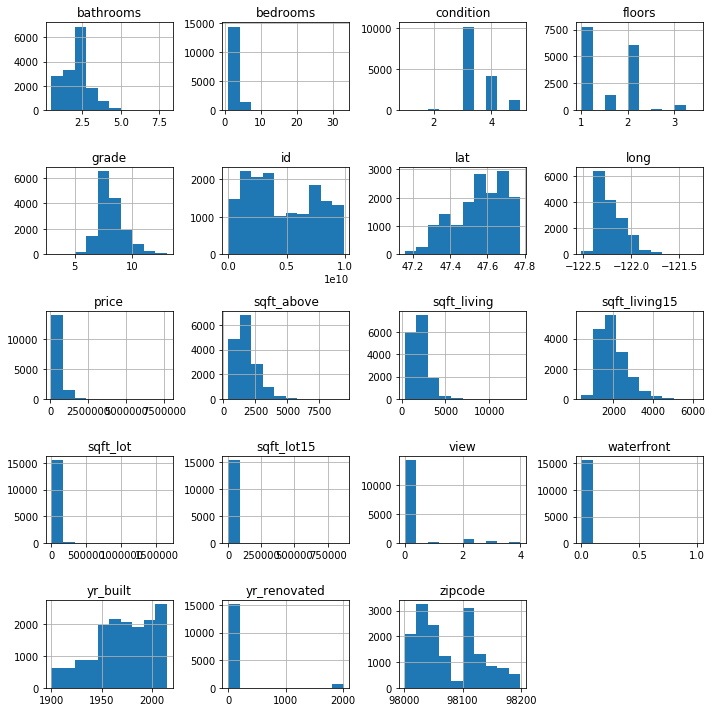

In [91]:
df_renovated.hist(figsize=(10,10))
plt.tight_layout()

## Scatter Matrix

<class 'numpy.ndarray'>


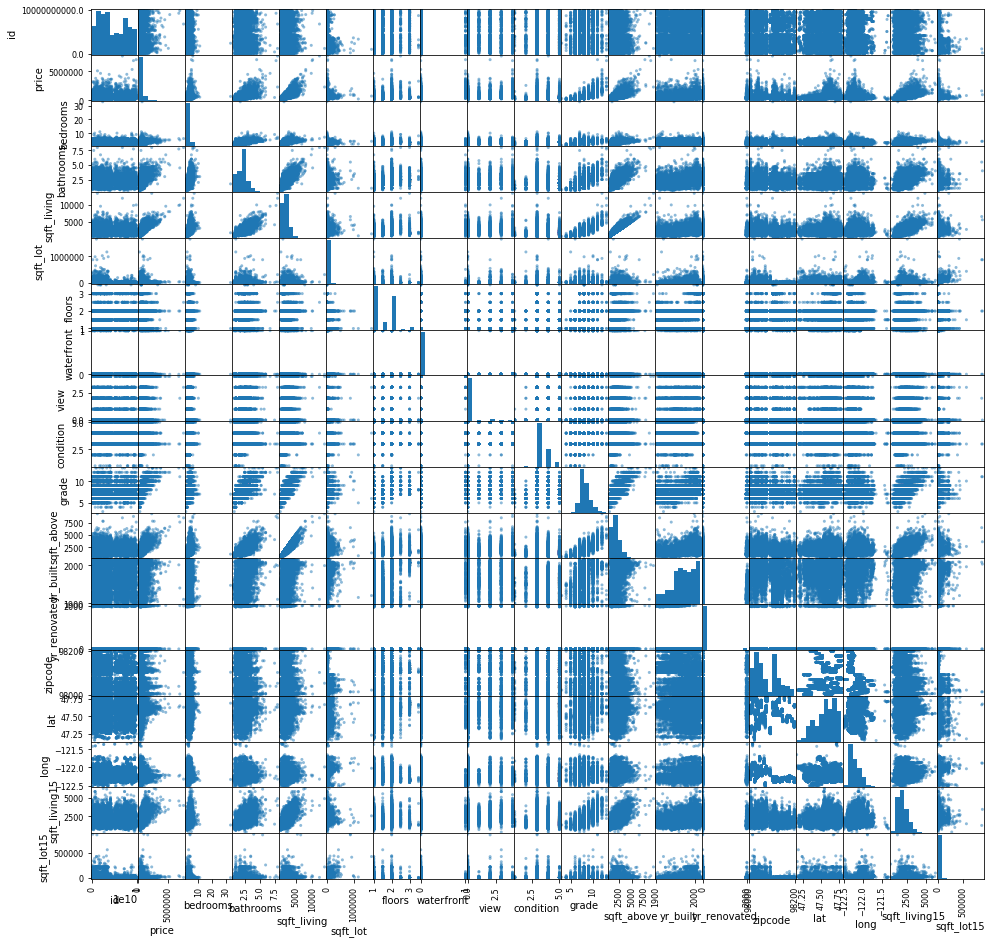

In [92]:
fig = pd.plotting.scatter_matrix(df_renovated,figsize=(16,16));
print(type(fig))

## Heatmap

Text(0.5, 1, 'Correlations')

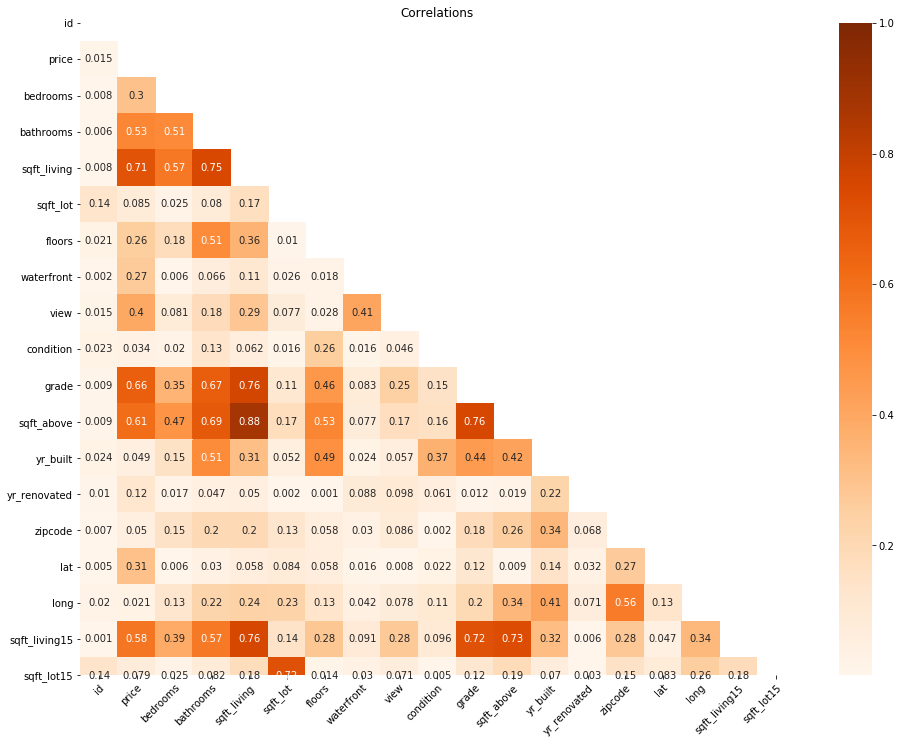

In [93]:
fig, ax = plt.subplots(figsize=(16,12))

corr = df_renovated.corr().abs().round(3)

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask, cmap='Oranges', ax=ax)
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="right",
         rotation_mode="anchor")
ax.set_title('Correlations')

## Scatter Target Variables (better way to do this?)

IndexError: index 10 is out of bounds for axis 0 with size 10

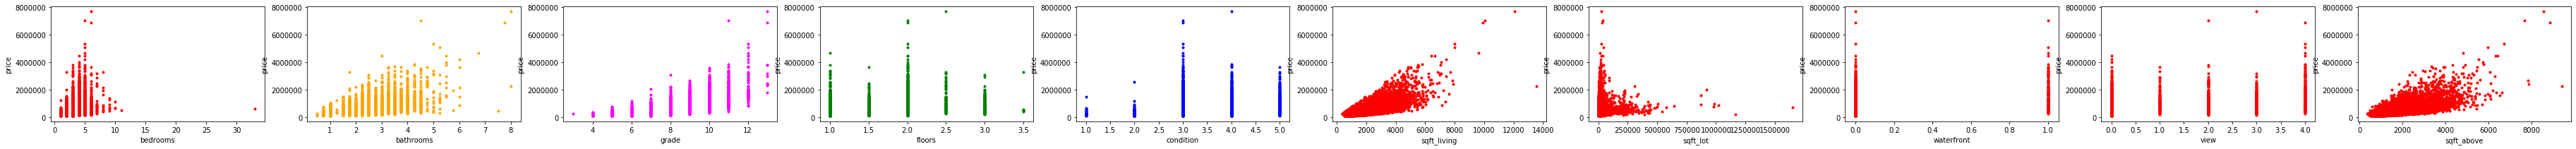

In [94]:
cols_to_plot = ["bedrooms", "bathrooms","grade","floors", "condition", "sqft_living", "sqft_lot", "waterfront", "view","sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]

colors = ['red', 'orange', 'magenta', 'green', 'blue','red','red','red','red','red','red','red','red','red','red','red','red','red']
fig, axes = plt.subplots(ncols=10, figsize=(64,3))

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=df_renovated[col],y=df_renovated['price'],c=colors[i],marker='.')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('price')
    
plt.tight_layout()

## Plots

### Grade/Price Plot

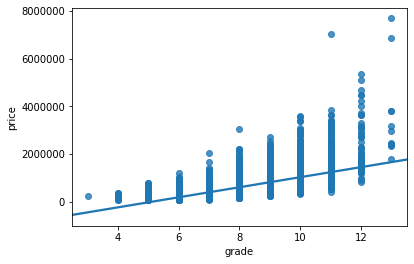

In [96]:
sns.regplot(x= 'grade', y= 'price', data=df_renovated)

### Bedrooms/Price Plot

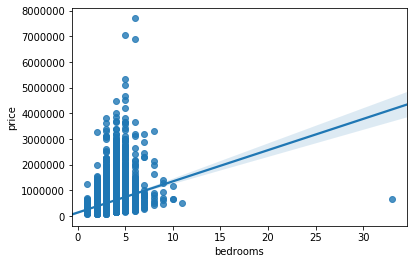

In [97]:
sns.regplot(x= 'bedrooms', y= 'price', data=df_renovated)

### Bathrooms/Price Plot

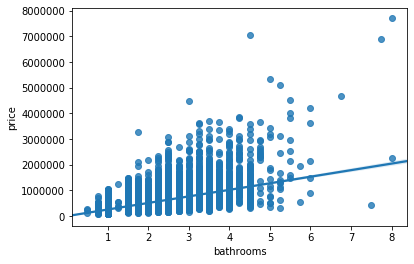

In [98]:
sns.regplot(x= 'bathrooms', y= 'price', data=df_renovated)

### Condition/Price Plot

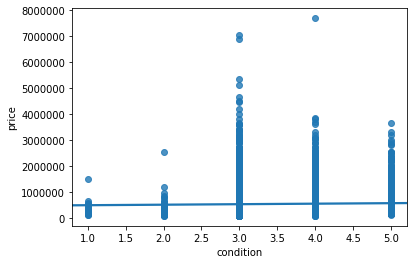

In [99]:
sns.regplot(x= 'condition', y= 'price', data=df_renovated)

### Floors/Price Plot

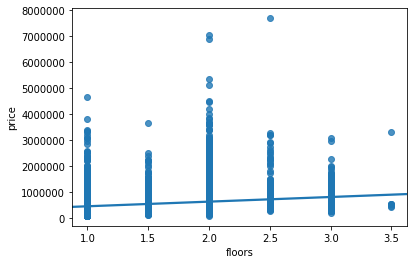

In [100]:
sns.regplot(x= 'floors', y= 'price', data=df_renovated)

### SqFt_Living/Price Plot

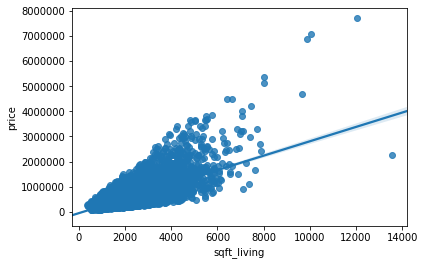

In [101]:
sns.regplot(x= 'sqft_living', y= 'price', data=df_renovated)

### SqFt_Lot/Price Plot

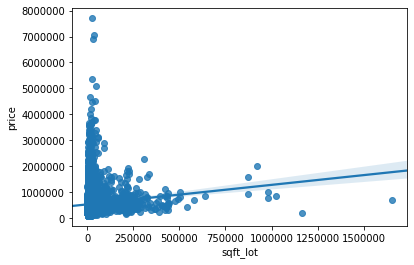

In [102]:
sns.regplot(x= 'sqft_lot', y= 'price', data=df_renovated)

### Waterfront/Price Plot (?)

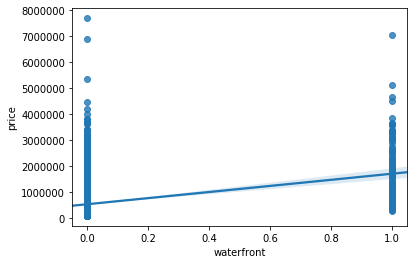

In [103]:
sns.regplot(x= 'waterfront', y= 'price', data=df_renovated)

### View/Price Plot

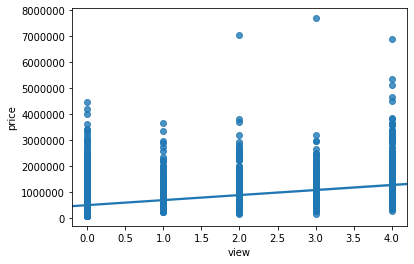

In [104]:
sns.regplot(x= 'view', y= 'price', data=df_renovated)

### SqFt_Above/Price Plot

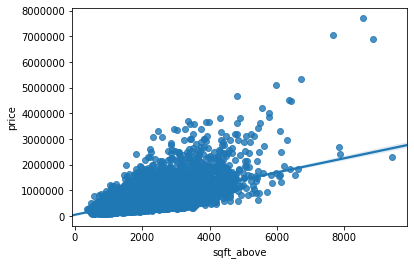

In [105]:
sns.regplot(x= 'sqft_above', y= 'price', data=df_renovated)

### SqFt_Basement/Price Plot (Needs Fixing)

TypeError: Could not convert 400.0910.00.01530.0?730.00.0300.00.00.0970.00.00.0?0.0760.0720.00.00.00.00.00.00.00.0820.00.0780.0790.0730.00.0330.00.01620.0?0.0360.00.00.00.0588.00.01510.0990.0600.00.00.00.00.0550.01000.00.01600.01700.00.0500.0700.01040.0500.0?0.00.01010.00.00.0240.00.00.00.00.0290.0290.0910.00.00.0600.00.0800.0540.00.00.00.0500.00.00.00.0560.0?1000.00.00.00.0840.00.00.0770.00.0570.01490.0620.00.01010.00.00.0600.0650.00.0180.00.01130.0450.00.00.01640.00.00.01460.01020.00.00.01030.00.00.0750.01010.0400.0640.00.01070.00.01310.00.0300.0650.0630.00.0700.00.0990.02000.0390.0800.00.00.0760.00.00.0840.00.00.00.00.0400.00.00.00.0700.0210.00.00.00.00.0?1950.00.00.0400.00.0440.00.0450.00.0220.00.01160.00.00.0580.0300.0300.02060.00.00.00.00.0240.00.01820.00.0790.0570.00.00.0600.00.00.01180.0380.00.0780.00.00.00.00.00.0650.00.0500.00.0970.01150.00.01200.00.0680.00.0650.01450.0500.01170.00.01010.0700.00.0700.0500.01950.00.00.01080.0960.0400.00.00.0280.01600.01600.0600.0870.00.00.00.00.00.00.0280.00.00.0780.00.00.00.00.00.00.00.01200.00.00.00.00.01250.00.0600.0500.01100.00.00.00.00.00.01400.00.0530.0720.00.01080.00.00.00.0530.00.00.01010.0970.0?0.00.0490.00.00.00.00.00.00.01220.0900.00.0420.01580.00.00.00.00.00.00.00.00.00.00.01380.0475.0910.00.00.00.00.00.00.0500.0240.00.00.00.0690.00.0270.01400.0580.00.00.0350.00.00.00.0935.00.01040.01150.00.0650.00.00.00.0200.00.00.00.00.00.00.00.01040.00.00.0200.01130.0850.00.00.0450.00.01000.00.00.0620.00.00.0440.0360.0400.01470.0300.00.0630.00.00.00.0160.0?0.0850.00.00.00.0950.00.0400.00.01370.00.00.01010.00.00.00.00.0460.00.00.00.00.0500.00.00.00.050.00.00.0350.00.01040.00.00.00.00.00.00.0820.00.00.0710.00.0290.00.00.0800.00.01900.00.00.00.00.0340.00.0200.00.00.00.00.00.0470.00.00.00.00.00.01450.0160.00.0370.0700.00.00.0540.00.00.00.00.0730.00.00.0140.00.0570.0280.00.00.0480.0?0.00.00.0500.0910.0130.00.0?0.0450.00.00.00.0470.00.00.01600.00.0800.00.00.00.00.0?0.00.00.00.0800.0690.0?880.0600.0520.00.0890.00.0470.00.0630.00.0?0.00.00.0400.00.0130.00.0840.00.00.0450.0300.00.00.00.00.0400.00.00.00.0700.00.00.00.00.0970.00.0340.00.0600.00.00.00.00.0640.0660.01110.00.0150.00.00.0600.00.00.0440.01010.0140.0600.0?1720.01040.00.00.00.0140.00.00.01200.0960.0810.00.00.00.01000.0160.0850.01760.00.0620.00.00.00.00.0330.00.01290.0670.00.00.00.01510.00.00.01030.00.00.00.0340.00.01800.00.00.00.00.00.00.00.01120.0680.00.00.00.01110.00.00.01220.0400.00.00.00.0530.00.00.0340.0640.00.00.01180.00.00.00.0420.00.00.00.00.00.0960.0600.0400.01460.00.00.00.0500.00.00.01000.0?680.0770.00.00.00.0210.01380.00.0350.00.0630.01250.0400.00.00.0700.00.00.01050.00.0940.0310.00.00.00.00.00.00.0930.0560.01390.0640.0640.0290.01150.00.01020.00.0270.0610.00.00.0710.00.00.01040.0910.0580.00.00.00.00.0340.00.00.00.0950.00.00.00.00.01110.0310.00.0120.0700.00.00.00.01300.00.00.0510.00.00.00.050.0570.0360.00.00.0500.01590.00.00.00.00.00.00.00.0500.00.00.00.00.00.00.0700.00.00.00.0470.00.00.00.00.00.00.00.00.0350.01380.00.00.0530.01620.0800.00.00.00.0210.00.0550.00.00.00.0700.0810.01000.00.0940.00.0630.00.00.01200.00.00.00.00.0200.00.00.01200.00.01200.01040.0?990.0920.0360.00.00.00.00.0550.00.01040.01040.00.00.00.00.01270.01320.00.00.00.0420.00.00.00.00.00.00.00.00.00.00.00.0490.00.00.00.00.00.01010.0700.00.0990.00.01240.01960.0140.00.00.00.0840.00.00.00.00.00.00.0600.00.00.01050.00.00.0440.02020.00.0340.00.00.01220.0860.00.00.00.00.0280.00.00.00.0750.0960.00.00.0600.00.0690.01190.0400.00.00.02110.00.0550.0790.0790.00.0420.00.0?1250.0630.0840.00.0300.00.0960.00.00.0960.00.00.01000.0990.00.0770.0770.00.0600.00.00.0820.00.00.00.0330.00.01030.01400.00.00.0800.00.0700.00.01200.0940.0940.0470.00.0400.00.00.0660.00.01280.0730.00.00.0640.0640.01150.00.00.0530.0120.00.0560.00.00.00.00.00.00.0240.00.00.0250.00.0350.00.0560.01300.0700.00.0220.00.00.00.0500.00.0950.00.00.0190.00.00.00.00.0370.00.00.0500.0820.0840.00.00.00.00.00.00.00.00.0960.01230.00.00.0640.0750.00.0700.0430.01600.00.0?1780.00.00.0620.00.00.00.0800.00.0650.00.0730.00.0640.00.0480.0650.0450.01330.00.0290.00.0200.00.00.00.00.00.00.00.00.00.00.00.00.00.0650.00.00.00.0450.00.00.0250.02020.00.00.00.00.00.00.00.0600.00.0950.00.0120.01700.0920.01290.0400.00.0720.0940.0290.01280.0700.00.0700.00.00.00.00.00.00.00.01220.00.00.00.00.0?0.00.00.00.0530.00.00.00.0390.01100.00.00.00.01030.0830.00.00.00.01250.00.0530.0600.0760.00.00.00.0900.00.0370.0860.0670.00.0280.00.0240.0930.00.00.00.00.0240.0400.0880.01110.0330.0820.00.00.0600.00.00.00.00.0860.00.0480.0760.00.00.00.00.00.00.0830.0780.0890.00.00.0150.0550.00.00.00.0550.00.0340.01450.00.00.00.00.0590.0?0.0660.01500.00.0890.0380.01000.00.00.00.0420.00.00.01160.00.00.00.00.00.0610.0530.00.00.00.01190.00.00.0300.01000.00.00.00.0470.0140.00.00.00.00.00.00.00.0220.0920.00.00.0?0.0940.00.0?0.00.01300.00.01180.0440.00.0550.0960.00.00.00.00.00.00.00.00.00.00.00.0360.00.00.00.0840.0350.00.00.0600.00.0750.0590.01400.00.01070.00.00.0960.00.0450.0780.01110.0780.00.00.00.01400.00.01320.00.00.00.00.0600.00.0800.00.00.00.01010.00.00.00.00.0140.0?0.01280.00.0440.00.01580.0100.00.0330.00.0910.00.00.00.00.00.0900.01070.00.0900.0620.0140.00.00.00.00.00.0?0.00.0400.01020.00.00.00.0470.00.0800.00.00.0520.0530.0150.00.0680.01180.00.00.0300.00.01270.00.0750.01800.0500.0320.00.0850.00.0200.00.0920.00.0830.0380.0600.0?0.00.00.01480.0380.01190.0460.00.0310.00.0850.01280.00.01040.00.00.01260.00.00.00.00.00.0400.00.00.00.00.0400.00.00.00.01010.0500.00.00.0620.0640.0910.0360.00.00.00.00.00.0580.00.00.00.01284.00.0430.01000.00.0450.0720.00.01240.0760.00.0780.00.00.00.00.00.0460.01400.0690.00.00.0260.0580.0750.00.00.0890.00.00.01330.00.0940.01670.00.00.00.00.00.00.00.00.00.0440.01350.00.00.00.00.0360.00.00.01510.00.00.00.00.00.00.00.00.0800.00.00.00.0650.00.0270.0900.0820.00.00.00.01120.00.00.00.00.0260.00.0290.00.00.00.00.00.0740.00.0400.0380.00.0520.00.00.00.00.00.00.0390.00.00.00.00.0520.00.00.0100.00.00.0190.00.00.0920.00.0600.00.00.0800.00.00.00.02570.00.00.01320.00.00.00.00.01030.0810.00.0400.0440.00.00.00.00.0360.0400.0880.02110.00.0720.0700.00.0580.0540.01150.00.00.00.0?0.01090.00.00.00.0740.0?960.0760.00.00.0720.0400.0420.0750.00.00.00.0?0.00.00.00.00.0400.00.0310.00.00.0?0.0700.01580.00.00.0370.0110.0700.01300.00.00.00.00.00.00.0600.00.00.00.00.0980.0460.00.0?0.00.00.00.0610.01410.00.0200.00.0?0.00.01480.0430.00.00.0700.0460.01200.00.0140.00.00.0120.00.0750.0720.00.0880.01300.00.0470.090.0990.00.00.0440.00.00.00.0590.0770.00.01320.00.01940.01200.0880.00.00.00.00.0660.0950.0600.00.0760.0800.00.0650.00.0700.0720.00.00.0830.01070.01400.0450.00.00.00.00.00.00.0320.0360.00.01280.00.00.0860.00.01100.00.00.0610.00.00.00.00.0340.01380.0790.0610.00.00.00.00.01300.00.0160.00.00.00.00.00.0260.0540.00.00.00.0930.00.0760.01020.0950.01230.0700.00.01550.01300.00.0500.00.00.01000.0580.00.0350.00.00.00.01280.00.00.00.00.0810.0980.02350.00.00.00.00.00.01050.00.00.0590.00.01160.00.00.00.00.0420.00.00.01110.00.00.00.00.00.0700.00.00.0260.00.00.02490.00.00.00.01340.00.01481.00.00.01360.00.00.00.00.00.00.00.00.00.0260.0300.0400.00.0?0.0820.00.0330.00.00.00.00.00.0530.0530.0250.00.0690.00.0420.0920.00.00.0450.00.00.00.0300.00.00.00.00.00.00.0?0.01135.00.0200.0200.00.0620.00.0600.00.00.0220.00.00.0580.00.0560.0840.00.01330.00.00.00.0960.01350.00.00.01470.01380.0520.01110.0900.00.00.00.00.00.00.00.00.0590.00.00.0?0.00.0200.00.00.00.00.00.00.00.00.0240.00.00.00.0120.00.00.00.00.00.00.0980.00.00.0450.00.00.0290.01520.00.0600.00.01850.0460.00.0300.00.00.00.00.00.00.0400.00.00.00.00.01660.01390.0780.01250.01260.0400.0?1050.0400.0?1010.00.02130.00.00.00.0450.00.0770.00.0280.0240.00.00.00.00.0210.0510.00.00.0430.0810.0180.00.00.00.00.0780.00.0850.01180.0690.0870.00.02600.00.00.0500.0630.00.00.00.0530.00.00.01450.01200.01120.0470.0840.0770.0730.0440.00.00.00.01120.0940.00.00.00.00.00.0380.01850.0130.00.00.00.00.00.00.0530.0700.00.0920.0600.00.00.0720.00.00.00.0650.00.00.00.0390.00.0?750.0530.0790.00.0450.0720.0160.00.00.0990.00.01850.00.00.00.00.0390.01070.0760.00.00.00.00.00.00.01020.00.00.0900.00.00.00.0490.01400.00.00.01070.0550.0880.00.0750.0800.0540.0130.00.0440.0640.01140.01080.00.00.0420.00.00.00.0400.00.0243.00.00.00.00.01600.00.0530.0890.00.0370.00.00.0260.00.00.00.00.01210.00.00.00.0670.0450.0600.00.00.0890.00.00.0400.01520.00.00.0700.01780.00.00.0240.0400.00.00.0820.0700.00.00.00.00.00.00.0?0.0690.00.0910.0800.00.00.0710.00.0990.00.0600.0640.0340.0700.00.00.00.00.00.00.00.01000.00.00.00.00.00.00.0860.00.00.0900.00.0420.00.00.00.00.0700.00.00.0140.0340.00.00.0580.00.01320.0520.0980.00.00.0700.0580.00.00.00.0830.0890.0?650.0400.00.00.0?0.00.00.00.00.00.00.00.01350.00.00.00.00.00.01260.00.01330.00.00.00.00.00.00.00.0630.0320.00.00.00.01020.00.0630.0?0.00.01200.00.01000.00.0170.00.00.0800.00.0?600.00.01150.00.01000.01110.0660.0810.00.00.00.0720.00.01110.00.00.00.00.00.00.00.00.0830.0220.01600.00.0800.01140.00.00.0360.0270.00.00.00.0?630.0860.00.00.00.0480.00.0720.0800.00.0500.00.0500.00.0990.0980.0860.0720.0900.00.0440.00.00.00.00.00.00.00.00.00.00.01400.0680.0100.0860.00.00.00.01230.00.0750.00.01240.01024.0350.00.0580.00.01120.0200.00.0420.0740.00.00.00.00.0140.00.00.0710.00.0850.01300.00.00.01798.0240.02060.00.00.0450.0620.00.0640.0800.00.0550.00.00.00.01010.00.0800.0200.00.00.0400.0330.00.00.00.00.00.00.0690.00.0630.00.00.00.00.0830.0500.00.00.00.00.00.00.0700.00.00.00.00.0260.0260.0760.00.00.00.00.01210.00.00.00.0910.00.0300.00.0790.0860.0940.01610.0880.0190.0400.0?0.00.01780.00.00.00.0480.0100.00.01440.00.00.0530.00.00.00.00.00.00.0930.00.0190.00.01190.00.00.00.0290.0200.00.00.00.00.0710.0570.01000.00.00.0360.01590.00.00.00.0310.00.00.01120.00.00.00.0430.0800.00.0670.00.0400.00.00.0750.00.00.0600.00.0320.00.00.00.00.00.00.00.00.00.0800.01500.00.00.00.00.00.00.00.00.0500.0930.0560.00.00.00.00.0450.00.0700.00.0820.0690.0340.00.00.01010.0500.0300.00.0400.00.00.00.0220.00.00.00.00.0400.00.0?0.0960.00.00.00.00.00.00.0140.01250.00.00.00.0760.00.0620.00.01250.01600.00.00.00.0940.00.01290.00.00.01330.00.0620.00.00.00.00.0770.0900.00.00.00.0900.0700.00.0910.00.00.00.0550.00.0180.0890.0200.00.0310.00.01300.00.00.00.0600.00.00.00.0890.00.01010.0910.00.00.00.0500.0460.0860.00.00.00.0720.00.0110.00.0460.00.01690.00.0740.00.00.0900.00.0480.00.00.00.0?0.0300.0220.00.00.00.0120.0500.01500.00.00.00.00.00.0530.00.00.01010.0420.0900.01290.00.00.00.0700.00.00.00.00.0930.0120.00.0550.00.00.01130.0160.01030.0960.00.0910.00.00.00.00.0250.00.00.00.0840.0590.0500.00.00.0850.0240.00.00.0940.00.00.00.00.00.00.00.00.00.01060.0400.01070.00.00.01030.01060.00.0100.00.00.00.00.00.0810.01570.00.0270.0660.0200.00.0860.0980.0590.00.00.01200.01400.01160.00.00.00.0700.00.00.00.00.00.00.00.0840.00.00.00.01250.00.0150.0430.00.01120.00.00.01100.00.00.00.00.01250.00.00.00.00.00.0120.00.00.0800.00.0920.00.00.00.00.0520.0960.0470.0990.00.00.0440.00.01500.01110.0180.0950.00.00.01020.01910.00.0490.0400.00.00.0700.0600.00.0700.00.01630.00.0400.0600.00.00.00.00.00.00.0320.01240.00.00.0790.0200.00.0910.0480.0960.00.00.0520.0810.00.0650.01100.0260.0430.00.00.00.00.00.0840.02360.0500.0990.00.00.0880.0540.0320.0490.0480.0200.0770.01852.00.0600.00.00.0500.00.0530.0420.00.00.00.0350.00.00.00.01020.0600.0820.0660.0750.00.0810.00.0400.00.00.0400.00.00.00.0850.00.00.00.0370.0510.0890.00.0800.0960.0460.00.00.01230.00.0740.0450.00.0920.0?770.0700.00.00.00.0660.00.00.0450.00.00.00.00.0250.01480.01040.00.00.0880.01040.00.00.00.0620.00.00.00.00.0850.00.00.00.00.00.0850.00.00.050.00.00.00.00.0530.0520.0390.00.00.00.00.00.00.0150.00.00.00.00.0600.0190.00.01380.00.0?1790.00.00.00.00.01340.00.00.00.00.01050.01370.00.0500.0570.00.0200.00.00.0590.0750.00.0400.0320.0720.0420.0810.00.00.00.0330.0870.00.00.0720.00.0290.00.01270.01320.00.01360.0520.00.0420.0170.00.00.00.0240.0770.0600.00.00.01060.0830.00.00.00.0810.0120.0460.0990.0?0.00.00.00.00.00.0?220.0200.0260.01200.01370.0300.0650.0590.01020.01500.0810.00.00.00.01440.01210.00.00.00.00.0980.00.00.0900.00.00.0400.00.00.00.0680.00.0290.00.0500.070.00.0960.0850.0840.0140.00.00.01430.00.00.00.0400.00.00.00.00.00.00.00.0960.0520.0790.01030.00.0820.00.00.00.00.00.00.00.01720.00.00.0560.0900.01500.00.0530.0280.00.0380.00.00.00.0910.00.00.01010.00.0110.00.0300.0880.00.00.00.00.00.01110.01360.00.00.01080.0?400.0870.00.0290.0890.00.01250.00.00.00.01010.01410.00.00.0980.00.00.00.00.00.00.0600.00.0530.0460.0350.00.00.00.00.00.00.0770.0960.00.00.0?0.00.00.00.0750.0?0.00.00.00.00.00.00.00.00.00.0320.00.0700.0790.0740.0150.0800.00.00.0120.01680.00.00.00.00.00.01870.00.00.0240.00.00.00.00.00.00.00.01350.01530.0940.01420.01300.00.00.01140.00.00.00.00.00.00.00.0500.0900.0360.0220.00.00.0770.050.00.0550.00.0750.0520.0900.0900.00.00.00.00.00.00.00.0370.00.00.00.00.00.00.0340.00.0600.00.00.0420.00.00.00.0780.00.01140.00.0870.00.0?0.00.0840.00.0300.01020.0480.00.0670.00.0400.0560.00.0240.00.01020.00.0500.0780.0400.00.0900.0?0.00.00.0680.00.00.00.0390.00.00.0950.00.0250.0380.00.01090.00.0800.0710.00.01040.0120.00.0800.01050.0460.00.00.00.0200.00.0730.01460.00.00.00.0490.00.01140.0740.00.00.00.00.00.00.0200.01210.0140.0?620.00.01200.0550.0150.00.00.0230.00.01640.00.00.00.00.01110.00.00.0740.01300.0?720.00.00.00.00.00.0890.0490.01180.00.01000.00.00.00.00.00.00.00.00.0360.0450.0300.00.00.0150.01300.0550.00.0730.00.0840.00.00.00.00.01020.0920.0630.00.00.00.01100.0?750.00.00.00.00.00.01110.00.0690.0600.00.00.0820.0330.0120.00.00.0610.00.0500.00.0?0.00.00.00.0640.00.00.01160.00.00.01300.00.00.00.00.00.00.00.00.00.00.0830.0910.00.0160.00.00.0680.0670.0540.00.0350.0170.00.00.00.00.00.0?0.00.00.00.00.00.00.0570.00.0?0.01170.0800.01000.00.00.00.0710.0300.00.00.00.0420.00.00.0610.00.00.0450.00.00.0700.00.0760.0400.0650.01100.00.0620.0450.00.00.00.0870.00.0980.00.01410.02030.00.00.00.0490.0?0.0570.0970.00.0700.0530.0520.00.00.00.0590.00.00.00.0350.00.00.00.01650.0550.00.00.00.00.00.00.00.00.00.00.00.00.0680.00.00.0740.00.0830.0310.00.0910.01230.0220.01170.0630.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0580.0875.0780.0910.0?0.0730.01270.0120.0490.00.00.00.00.00.00.00.0740.00.00.00.00.0?860.0700.00.00.00.0560.01000.0650.01540.00.00.00.0630.0170.00.00.00.00.0360.00.0870.00.00.00.00.00.0740.01540.0880.0?0.00.0280.00.0900.00.0580.0240.0410.00.00.01710.00.0240.0780.01100.0??0.00.0770.00.0700.00.00.00.00.00.00.0430.00.0?0.00.00.0580.00.0940.00.0470.00.0550.0140.00.00.02850.0140.0840.00.00.0900.00.00.00.00.0620.00.00.0900.00.00.0870.00.0440.0450.00.00.01360.00.0150.00.0950.00.00.0400.00.00.00.00.0750.0910.00.00.0800.00.00.00.00.0640.00.01150.0650.00.00.00.0580.0630.00.00.00.00.0940.0820.00.00.00.00.0880.0990.0910.00.00.0120.0?0.00.00.01200.00.0470.0840.00.0800.00.00.00.0620.0390.01200.00.00.00.00.00.00.00.00.0490.00.00.00.00.0820.00.0640.0750.090.00.00.00.00.0400.00.00.0??0.00.0630.0830.0580.00.00.01800.00.01050.00.0650.00.00.00.00.00.00.00.00.00.01200.01130.00.01660.0720.0200.00.00.01400.00.00.0480.0500.00.00.0690.00.00.00.0930.00.00.0730.0860.00.00.00.0620.00.00.01100.00.0500.00.00.00.01000.0280.00.0530.0500.00.00.00.0700.00.00.0250.0740.00.0900.00.00.00.00.00.00.01010.00.00.0480.00.0700.00.0900.0530.00.0500.0700.00.00.00.0480.00.0310.00.0540.00.00.00.0630.00.00.01300.01300.00.00.0760.00.00.0900.00.00.0330.00.00.00.0400.00.01260.00.00.0840.00.0770.00.00.00.00.00.0900.01420.0?600.00.00.0430.0730.0260.0?0.0900.00.00.0620.01100.0680.00.00.0620.00.0740.0940.00.0?430.0140.00.00.00.00.0900.00.00.0430.00.00.01020.01420.0840.0600.0540.00.00.00.00.00.00.0880.0680.00.02170.0200.00.00.00.01450.00.0740.00.00.00.00.00.0890.00.0240.0660.01180.00.0800.00.00.00.00.0680.00.0?0.00.0480.00.0880.00.00.00.00.0450.00.00.0990.00.0720.00.0670.00.00.0880.00.00.0510.0620.00.00.0540.00.0770.00.00.0750.0420.00.0?0.0?0.00.00.00.0540.060.00.01070.00.00.00.0480.00.00.00.0590.00.00.00.0360.00.01170.00.00.0530.00.00.00.00.00.00.00.00.00.0340.00.00.0500.01010.00.0110.0506.00.00.0480.00.02150.00.00.0?0.01010.00.0240.01300.0820.00.0570.00.00.0440.00.00.0680.00.00.0?0.00.01100.00.0130.00.0810.00.0870.00.0600.00.00.00.0906.0510.00.01230.00.00.01060.0880.00.00.00.01560.0520.0900.00.00.00.0430.0650.0740.00.00.0160.00.00.00.00.00.0?0.00.00.01270.01830.00.00.00.00.00.00.0280.0830.00.01120.00.0350.01150.00.0500.0940.0760.00.00.00.00.01720.00.0580.00.00.00.00.0900.0570.00.0270.00.0990.00.00.0580.00.0?500.01140.00.0560.01170.00.0620.0830.00.00.00.0500.00.0790.00.00.0830.00.00.0760.0480.00.00.0?0.00.00.00.00.0700.0800.00.00.0600.0380.0?0.0890.00.00.0310.0670.00.01000.01670.00.0790.00.01000.0440.00.01110.00.00.0930.01020.00.00.00.00.00.00.0860.00.0250.00.00.00.0650.00.00.00.00.00.0740.0600.0800.00.00.00.0?0.0800.00.00.00.00.0780.0430.00.0600.0840.00.00.00.00.00.00.00.00.00.01030.00.0620.0450.00.00.00.00.00.00.0880.0120.0200.00.00.00.00.00.00.00.00.00.00.0145.0700.00.00.00.00.00.00.00.0770.00.00.0910.00.00.0800.00.00.00.0800.01020.00.0570.00.00.0870.0450.00.0700.00.0870.0620.00.00.00.00.0520.0960.00.00.0750.01500.00.00.00.00.00.0460.0350.00.00.0780.0890.0?0.0710.0790.00.01530.00.0950.0190.0380.00.00.00.00.0850.0?0.00.0680.00.01430.0240.00.00.0460.0720.0200.0900.00.0720.00.0?420.00.01220.00.00.00.00.0760.0750.00.0290.00.00.00.0740.00.0?1120.0?0.0490.00.0810.00.00.00.00.0500.00.00.00.0510.0500.00.00.00.0640.00.01370.0780.00.00.00.0970.0820.00.0900.0830.0800.0490.0410.0730.00.00.00.00.0?0.00.0500.00.00.01530.0850.00.0840.00.0170.00.0960.00.0800.00.00.00.00.00.00.00.00.01080.01040.0690.00.00.0520.00.00.0900.0760.0190.00.02170.00.00.00.00.00.00.00.00.01180.01210.0600.01220.00.00.00.0420.0400.0770.0530.00.0840.0500.00.00.0600.00.00.01940.00.0?740.00.00.00.0380.00.00.00.00.00.0950.00.00.0540.00.0840.00.0800.0980.00.00.00.00.00.0460.00.0140.0320.00.01210.00.0150.0600.0790.00.0400.0720.00.00.02040.0850.00.01190.0500.00.00.0430.00.0410.00.00.00.01200.00.00.00.00.0780.00.00.0700.00.0?780.00.0690.0784.00.00.00.01170.00.0270.00.0?540.0760.00.00.00.0720.00.00.0960.00.00.00.00.00.00.0160.00.00.00.0290.0?0.00.00.0520.0240.0520.00.0600.00.0910.0420.00.00.00.00.00.00.00.0720.00.00.0960.00.00.0160.01490.0760.00.00.00.00.00.00.0220.0580.01180.00.00.00.00.0400.0?780.01230.00.0?1200.00.0650.01000.00.00.00.00.00.0400.0200.00.00.00.0250.00.0400.00.0440.0810.0280.00.0850.00.00.0360.00.0710.0930.01000.01750.0530.00.00.00.0920.00.0440.00.01130.0900.0460.00.00.01000.00.0700.0340.01270.00.00.01230.0500.00.00.0374.01040.00.00.0390.01000.00.0350.0120.00.0500.01570.0800.00.01120.01000.00.00.0480.00.01040.0970.0970.00.00.0620.0750.00.0700.0400.0250.0930.00.0890.00.00.00.00.00.0730.00.00.00.0930.00.00.00.00.0840.00.00.00.00.00.00.0860.0?620.00.00.00.0380.0480.0990.0220.0340.0840.00.0380.0?140.00.00.01420.00.0540.01060.0390.01060.00.00.00.0900.00.0560.00.00.01460.00.01210.0518.0950.00.00.00.00.0670.0470.00.00.02720.00.00.0670.00.01030.0300.00.00.00.00.00.00.01340.00.00.00.01720.00.01060.0?0.00.00.0200.00.0950.01100.00.00.01080.00.00.01200.00.0350.0800.00.0400.00.0800.00.00.00.0440.00.00.0500.00.00.01250.00.0600.00.00.00.00.0340.00.00.00.0300.00.0690.0270.01200.0850.00.0?0.0410.00.00.0390.00.00.00.00.0690.0580.0500.00.00.00.00.00.00.00.0500.00.00.00.00.00.0?1220.00.0250.0720.00.00.00.00.00.0?1290.00.0900.0530.01230.0240.00.00.00.00.00.0700.00.00.00.0850.0270.00.0?0.00.0740.00.00.0550.00.00.00.01230.00.00.00.00.01020.00.00.00.0530.00.00.00.0790.0940.0300.00.00.01050.0830.00.00.00.00.00.00.00.00.0810.00.00.00.00.00.00.00.00.0350.00.00.00.00.01000.0200.01420.00.00.00.0660.0860.00.0380.0120.00.00.0600.00.00.00.0710.00.00.00.0600.00.00.01010.00.0630.0680.00.01060.00.01660.00.00.0540.01610.00.00.0770.0480.00.00.0460.01390.00.00.0910.00.00.0810.00.00.01000.00.00.01210.00.00.01080.01110.0900.00.0700.00.0610.00.01160.0570.00.00.0340.00.00.0600.00.00.0?0.00.00.0820.00.00.00.00.0250.0730.00.00.00.00.0780.00.0200.0750.01500.0770.00.00.01070.0880.0310.0690.00.01340.00.00.00.00.00.00.00.0500.00.00.00.00.00.00.00.00.02730.00.00.00.0600.0360.0730.00.0890.0870.0590.0600.01720.00.00.00.01040.00.00.0500.0990.0880.00.0400.00.0970.00.00.00.0740.00.0500.00.00.01440.01260.01130.00.00.00.00.0250.0170.00.00.01060.00.0820.00.00.0760.00.00.0100.0600.0510.00.00.00.00.00.00.00.00.00.00.00.01220.00.00.00.00.00.01230.00.00.00.0950.00.00.00.00.00.00.00.00.0410.01480.00.0400.00.00.0550.0370.00.00.0?0.00.01360.00.00.00.00.0500.00.0300.0860.0640.0640.00.00.0980.00.01120.00.00.0790.00.01450.00.00.0130.00.0620.01090.01130.00.0250.0910.01120.00.00.00.00.00.0100.0900.00.00.0910.0?1000.01060.01840.00.00.0740.00.00.0200.0290.0630.00.0780.00.0920.00.0920.00.00.00.00.00.00.00.00.00.00.0480.03480.00.00.0200.0510.00.01120.00.0580.0300.00.0750.00.01010.00.00.0300.01010.0340.00.00.0420.0900.01250.0500.00.0500.01370.00.00.0520.0840.00.0350.00.00.0600.00.0940.0460.00.00.0600.00.00.0860.00.01000.00.00.0?0.01220.01010.00.00.0200.00.0350.00.00.0580.0940.00.0690.00.00.01330.01000.00.01440.00.00.00.0720.0910.00.00.00.01040.00.00.00.00.0?1040.00.00.00.00.0400.0500.00.00.00.00.0290.00.00.00.00.00.00.01340.0750.00.0530.0240.0830.00.00.00.0780.00.01540.00.0400.01220.00.00.00.00.00.00.0500.00.00.0740.00.0290.00.00.0400.01030.00.00.01790.0?680.00.0680.0530.0790.00.0190.00.00.0?0.00.0950.0140.01490.0400.01240.00.00.0620.01060.0940.00.00.0400.0100.0580.00.00.0790.0240.00.00.00.0200.00.0860.0560.01680.01300.00.00.00.00.0870.00.00.00.0860.00.0980.0620.0400.0550.00.00.00.00.0300.00.0960.00.00.00.00.00.00.00.0?290.0640.00.00.00.01430.00.00.00.00.0400.00.00.00.0300.00.00.00.0380.00.00.0360.0460.00.0880.00.01690.00.0700.00.00.00.01140.00.01100.00.01100.0860.0920.00.00.00.0400.00.00.0900.0?0.00.00.00.00.01100.0180.0550.00.00.00.00.00.00.0730.00.0600.00.0950.0?0.0270.01200.0810.00.00.00.01250.00.00.00.00.0600.00.0900.00.01200.01270.01380.0950.00.00.0440.0?0.0900.0210.01700.00.00.0100.00.01870.01030.00.00.0260.00.01040.00.00.00.01380.0180.0730.0800.0380.00.00.00.00.00.00.00.00.0920.00.00.00.00.00.0560.00.0760.00.00.01020.00.00.00.00.00.00.00.00.00.0670.00.00.0270.0350.0500.0760.0700.00.00.0520.00.0110.00.0880.00.0680.00.00.00.00.00.0210.0740.00.00.00.00.0380.00.0660.00.00.00.00.0830.00.0100.00.00.01190.00.0700.00.00.00.00.00.00.00.00.00.00.0200.00.0500.0?0.00.00.0750.00.01260.00.01000.0?500.0320.0400.00.0?0.00.0760.0800.0820.01920.02330.02330.00.00.00.01060.00.0470.00.0370.00.0300.00.0680.00.00.0530.00.00.00.00.00.0850.00.0790.00.0120.00.00.00.0470.00.0880.0900.0440.00.01200.00.01110.00.00.00.00.00.00.00.00.00.01860.00.00.00.00.00.0320.0370.00.00.01080.0780.0280.00.00.0460.0340.00.0760.00.00.0720.00.0820.00.00.00.0900.0200.00.00.0730.00.00.00.0640.01100.00.00.00.0510.00.00.0440.00.01090.0440.00.00.01080.00.01490.0610.00.00.0500.0730.0300.00.0150.0290.00.00.00.00.00.00.00.00.0910.00.00.0520.00.00.0600.00.00.0480.0810.0990.00.01180.00.00.00.00.0170.00.0600.0?790.00.02050.00.0340.00.00.00.0920.00.00.00.00.01050.0?670.00.00.0720.00.0800.00.00.00.01120.00.0550.00.00.0?0.00.0400.0610.0150.04820.00.00.0290.0140.00.0900.0310.00.0?680.00.00.0980.01050.00.00.00.00.00.00.0300.0220.00.00.00.0580.00.00.00.0360.00.00.0150.00.01410.01060.00.00.0950.01220.00.0420.0980.00.0600.01600.00.00.0550.00.00.0270.0420.00.0430.00.0350.00.0840.00.0300.0120.00.0120.00.00.00.00.00.00.00.00.00.00.00.0610.00.01560.0920.0770.0940.00.0700.01020.00.00.00.00.00.0?0.00.00.0670.00.00.0670.0?0.00.0590.00.0700.00.01000.00.00.0600.00.0600.0360.0970.01100.0860.0430.00.0850.00.0190.00.00.0360.00.0760.0800.00.00.00.00.00.00.00.00.00.00.00.00.00.0590.00.00.00.00.01060.00.00.00.00.00.0810.00.00.0380.00.01310.00.0400.0730.00.00.00.0600.00.00.00.0780.00.00.0450.0890.00.00.0700.00.00.00.01040.00.0780.00.00.01000.00.00.00.00.00.01913.0360.0?900.0140.00.0640.0800.0520.00.00.00.01830.00.0210.0190.00.0930.0660.0290.00.00.00.0390.00.00.00.00.00.00.00.00.00.00.00.00.00.0580.00.0320.00.00.00.00.00.0730.00.0750.0370.00.0300.0480.00.0730.01550.01010.0640.0640.00.00.00.00.0380.00.0640.00.00.00.0450.00.00.01440.00.0580.01050.00.00.0520.00.0400.0520.0750.0340.00.00.00.00.00.0560.00.00.0700.00.0870.0840.00.00.00.00.00.0720.00.00.00.00.00.0620.00.01180.00.01090.00.0840.00.00.00.00.00.00.00.00.00.00.0500.00.01030.00.00.00.00.01250.0190.00.0810.00.00.01200.00.00.00.00.00.00.0790.00.00.00.00.00.01150.00.00.090.0340.0400.00.0730.00.0890.0810.00.00.0550.00.0?0.01080.00.01060.0550.00.00.00.0920.00.0830.00.00.0990.00.00.00.00.00.0670.00.00.00.00.00.0560.00.0640.00.0250.0580.0480.0500.00.0920.00.00.00.00.00.01140.00.00.00.00.0300.00.0950.00.00.00.00.00.00.00.0580.00.00.0390.00.0680.0400.00.00.00.00.0??0.00.00.00.00.01060.00.00.01170.00.00.00.00.0?0.01210.0300.00.00.0650.0800.00.00.01030.01750.00.0740.00.00.00.0680.00.01090.0820.00.00.0100.00.0900.01120.00.00.0860.00.01200.0220.0980.00.00.00.0200.00.0850.00.00.00.0260.0960.00.0360.00.00.0650.00.00.00.00.00.0600.00.0520.0300.080.00.0210.0790.00.00.00.0820.00.0160.01000.0?1000.0900.0460.00.01100.0420.00.00.0400.00.0890.0750.00.00.0740.01200.00.00.0?660.00.0120.00.01760.0420.0240.0310.01200.00.00.0570.00.00.00.00.00.00.01910.00.00.00.00.00.00.00.0800.00.00.0530.00.00.0290.00.0420.00.0130.0560.0580.00.00.00.00.00.01200.00.0700.00.00.01870.0700.00.00.00.00.00.01100.00.00.00.0170.01010.0290.0370.0650.00.0780.00.00.0860.0900.00.00.01380.00.00.0500.00.01000.01000.00.0?610.0710.01320.0170.01280.00.0450.0450.00.00.00.00.00.01100.0660.00.00.00.00.00.0400.00.00.00.00.0670.00.0540.00.00.00.0440.00.01430.00.0140.00.00.01160.00.0890.00.0860.0830.00.00.0920.0510.00.0400.00.0470.00.0800.0860.00.00.00.00.00.00.01280.00.00.0?290.00.00.0940.0320.00.00.00.00.00.00.0?1070.0500.00.0950.00.00.00.01390.00.00.0430.01060.00.00.00.0860.00.00.0480.00.00.01230.00.0280.00.0890.00.0900.01540.01060.00.0640.00.00.0910.0440.00.00.01250.0490.0?600.00.00.00.0890.01230.00.00.01550.01070.0540.0310.00.00.01400.01000.0260.0870.00.0270.00.00.00.01040.0670.0480.00.0310.0520.0780.00.0?0.0?720.01500.00.00.00.00.0910.0?0.01000.00.00.01390.0500.00.0550.0500.0960.00.0680.00.00.00.0980.0110.0700.0900.00.0860.01040.0950.00.00.00.0540.00.00.00.00.00.00.00.01390.01680.00.00.00.00.00.00.00.00.00.00.0300.0220.00.0690.00.00.00.0400.0390.00.00.0600.00.0800.00.01650.01350.0920.00.00.01060.01220.00.00.00.0460.00.0380.00.00.00.0840.00.00.00.0300.00.00.00.00.00.01580.00.00.0900.01050.01310.01040.00.01030.00.01110.00.00.00.01090.0500.0900.0720.0290.01200.0150.00.00.01150.00.00.00.00.00.0430.00.00.00.0?800.0710.0290.00.00.00.00.00.00.01370.00.00.01220.01030.01060.0660.00.0260.0760.01370.00.00.00.00.00.0630.00.01260.0?0.00.0530.00.00.0810.00.00.01790.00.0600.00.00.00.0?850.00.00.01200.0870.00.00.00.0570.01200.00.00.00.00.00.00.00.00.0860.00.00.0250.0670.0?0.00.0390.00.00.00.00.0710.0990.00.00.00.00.00.00.0570.0500.00.00.00.0780.00.00.0880.0590.00.0?600.00.00.00.0610.00.0200.0330.0320.01850.00.0660.01210.00.00.00.01010.0270.00.0650.0250.00.00.00.00.00.00.0?2010.0300.01130.00.00.00.00.00.0810.01050.0240.00.0100.0460.00.00.00.0700.00.00.00.0800.0600.00.00.0760.090.00.00.0350.0820.00.00.00.00.0630.01290.00.0750.0540.00.00.00.0280.00.0880.00.01160.01040.00.00.00.01120.00.0620.00.00.00.00.00.00.00.0770.00.00.00.00.00.0800.00.00.00.00.00.0910.01000.0?300.0800.00.0450.0620.00.0520.00.0280.00.01040.0580.01010.0990.0500.00.00.00.00.00.0570.00.0340.0340.00.00.00.0900.0800.00.0610.01130.01170.0950.0860.00.0120.00.00.00.01370.00.0620.00.01100.00.00.00.0570.0790.00.00.00.00.0450.00.00.00.0820.0500.0200.00.00.00.00.0750.00.0850.0560.01010.00.0520.0500.00.00.01330.00.00.00.00.00.00.0500.00.0840.01300.00.00.00.0670.00.0400.00.0430.0300.00.00.00.01270.0260.00.090.00.00.0570.00.00.00.0410.00.0810.00.0480.00.01940.00.00.00.00.00.0?0.00.01000.00.0530.00.00.00.00.0700.00.0400.00.00.01410.00.00.0630.00.01200.00.00.0580.00.00.0990.00.0120.0500.00.00.00.0?0.00.00.0680.00.0510.0890.01160.00.00.00.00.01100.00.00.0720.0750.00.00.00.00.00.00.01250.00.00.0470.00.0670.00.01150.0120.0800.01250.0920.00.00.0?0.0580.00.0640.0400.0530.00.00.0650.00.01450.01070.01200.00.0420.00.00.0900.00.00.0?0.01390.00.0220.0340.0960.0710.0700.00.00.00.00.0800.00.0800.00.00.01000.00.0?490.0490.00.0660.00.0660.0830.00.00.0340.00.0800.0600.00.0190.00.0260.01340.00.0870.00.00.00.00.00.01230.01680.00.00.080.00.0200.0400.00.00.00.00.01170.00.0510.00.00.00.0800.01390.01200.0510.0880.0990.00.0550.0920.00.00.00.0700.00.00.00.0320.0300.00.00.00.00.0750.00.01040.00.00.00.00.00.00.00.00.00.0850.00.00.00.0600.00.00.0830.00.0960.00.00.00.00.0990.00.00.00.00.00.00.0520.00.0?0.00.00.0780.0270.0320.0900.00.01080.00.00.00.00.00.00.0100.00.00.00.01300.00.0130.0150.01280.0700.00.00.00.0400.00.00.0420.00.0280.00.00.00.00.0640.00.0120.0400.0300.00.03260.00.00.00.00.00.0260.0700.00.0940.01400.0700.0950.0?0.00.00.0?600.0930.0750.00.00.0860.00.01220.00.0?100.0700.00.00.0620.00.0910.00.00.00.0500.00.00.0840.00.00.00.0940.0870.0330.00.00.00.00.00.00.00.00.00.00.00.0?0.00.0470.00.00.0800.00.0230.01000.00.00.00.0?0.00.0750.00.0700.00.00.0760.0?140.00.00.00.00.00.0550.00.0900.00.0340.00.0980.00.00.0660.00.00.00.0750.00.00.0450.00.00.0800.00.00.00.00.00.00.00.00.00.0930.0800.00.00.00.00.00.00.00.00.00.00.0650.0650.00.0350.00.00.0400.00.00.0800.01820.00.0960.00.0880.00.01270.00.0290.00.00.0690.0630.0860.0450.0700.00.00.00.00.00.00.0120.00.00.0500.0470.00.00.00.01180.00.00.00.0100.0910.01070.02200.0530.0530.00.0740.00.0820.00.00.00.00.00.00.00.00.00.0870.0760.01010.00.0490.00.00.00.00.01320.0630.0880.0680.00.00.0840.0550.00.0500.0640.0550.00.0480.0500.00.00.00.01110.0300.01100.00.0300.0800.00.01000.01450.00.00.0220.0720.00.0900.00.00.00.01000.0?0.0850.01040.00.00.0480.0420.00.00.0220.00.00.00.01250.00.0920.00.00.0950.0?0.00.00.00.0840.0?600.00.00.00.00.0800.00.00.0980.0820.0700.00.00.0700.00.0840.00.00.00.00.00.0500.00.00.00.0360.01220.00.0820.00.00.00.00.00.00.00.00.0920.0820.0500.0390.00.00.00.0350.00.0300.00.0330.00.00.00.00.0140.00.00.01210.00.00.00.00.0500.0?0.00.00.0710.0530.00.00.00.00.00.00.0950.00.00.00.00.00.00.00.0550.0530.00.00.0780.0?0.01030.00.00.00.00.01260.00.00.00.00.0210.00.00.00.00.00.00.00.0700.00.00.00.00.00.080.0570.0890.00.0800.0420.0600.00.0?0.00.00.00.00.0350.00.00.00.00.00.00.01280.0530.00.0400.00.00.00.00.01090.00.0190.00.0670.0840.0460.00.00.0520.00.00.00.0770.0480.0450.00.0415.0400.00.0480.0380.0940.00.0530.0?0.0700.00.00.00.0400.00.00.00.00.00.00.00.00.00.0880.00.00.00.00.00.00.00.00.0?870.0880.0630.0670.00.0970.01280.00.01370.00.00.0670.00.01280.00.0980.00.00.0?160.0310.0790.00.00.0360.0430.01300.00.00.00.0500.00.00.00.00.00.00.00.00.00.01730.00.00.0620.00.00.0170.00.00.0900.0360.01600.00.00.00.00.01370.0520.00.0600.0680.00.01210.01130.00.00.0650.00.00.0580.0?0.0380.0870.0600.00.00.00.00.00.00.00.00.00.0870.00.00.00.00.0950.0740.00.00.00.00.00.01140.0450.00.01070.01700.0?652.00.0270.00.0550.00.00.01180.00.0230.01020.0740.00.0700.00.00.00.0480.00.0810.00.00.00.00.0700.00.0240.0770.00.0150.00.00.00.0650.00.0580.00.00.00.0380.00.01000.00.00.00.00.0850.00.0640.01050.00.01040.0290.00.00.0920.00.00.00.00.00.00.0?820.00.00.0740.0800.0300.00.0340.01110.00.0740.00.00.0630.0660.00.00.01500.0800.00.01140.00.00.00.00.00.02020.0580.00.0640.00.02100.00.00.01050.0290.0290.0310.00.00.01100.01540.00.00.02196.00.00.00.00.0480.00.00.0740.00.0870.0700.00.00.00.01060.00.00.01000.00.0530.00.00.0?0.00.0420.01590.00.0910.00.0480.0380.01330.00.00.0970.0450.0700.00.01100.0450.01060.00.00.00.0640.00.00.00.00.00.00.00.00.00.00.0310.0930.00.00.0870.00.0800.00.01570.0510.0450.00.00.00.00.01120.00.00.00.00.01930.0400.00.00.0460.0780.00.0?900.0500.00.00.0550.00.00.00.00.0110.0970.00.00.0100.0870.0490.00.00.01140.00.00.00.00.00.00.00.01160.0210.00.00.0480.0970.0780.00.01080.00.00.00.01020.0440.00.0310.00.00.0480.00.00.00.0350.0?0.0270.01180.01340.01240.00.00.01030.00.00.00.0700.00.00.00.0300.00.00.00.00.01210.00.0390.00.00.0740.0400.0750.0750.00.00.0800.0900.00.00.01000.00.00.00.00.00.0360.00.0740.01260.00.00.00.0400.0850.0730.00.00.00.0600.00.00.0470.0640.00.00.0360.0300.0430.00.00.00.0470.00.0260.00.00.00.0990.00.00.01000.090.00.01070.00.0460.00.00.00.0800.0560.0800.00.00.0810.00.00.00.01020.00.00.00.0770.0770.01150.00.00.0?0.0670.00.00.0?0.00.00.0260.0610.01060.0580.0150.00.00.00.0580.00.00.00.00.00.00.0?0.00.00.00.0940.00.00.0910.00.00.00.00.0310.00.0310.00.00.01270.00.00.00.00.00.00.0450.00.00.00.00.0360.00.0?1010.0940.00.00.00.00.00.01030.00.0390.01810.0750.00.01240.00.0900.00.00.00.00.00.00.0790.00.00.00.00.0850.00.00.00.040.00.00.00.00.00.00.0350.0180.00.00.01350.00.0920.0700.0830.00.01240.01270.01250.00.00.00.00.0770.0?0.00.00.00.0420.00.0800.00.00.00.0800.00.0140.0260.0?0.00.0780.00.00.0850.0800.00.00.0650.00.0?530.0850.00.0600.0450.00.01010.00.00.0180.00.0?880.0850.0450.00.00.0500.0900.00.0750.00.00.0690.0720.01400.00.0440.0530.00.00.00.0480.01410.01230.00.0150.0510.0860.0140.00.00.00.0500.0940.00.0480.00.00.01400.00.00.00.00.0790.00.0740.00.00.0610.0150.00.00.00.00.0510.01080.00.00.00.00.00.00.00.0540.00.0720.00.00.00.00.00.0300.0840.0?630.0600.00.00.00.01200.00.00.0480.0600.0340.00.01000.00.00.00.0800.0940.00.0820.00.00.0280.0720.00.01540.00.00.0560.0610.00.00.00.0?460.00.00.01340.00.00.00.00.0410.00.0100.0600.00.00.01590.0380.00.0520.00.00.00.00.0700.00.00.00.00.0800.00.00.0840.00.01370.00.00.00.00.0530.0340.00.0630.00.0?740.0980.00.0530.00.0950.01080.00.00.01510.00.00.0960.00.00.050.00.0420.0?0.00.00.00.00.0980.0330.00.00.0250.00.0120.00.01900.00.00.0360.0930.0?1250.00.00.0800.01050.0790.0860.00.01170.00.0480.00.00.00.00.01490.01430.00.00.0330.0250.00.0820.00.01070.00.0720.0500.00.00.00.0700.00.00.00.00.0380.00.00.01040.00.00.0?0.0760.00.00.00.00.0620.02580.0800.00.00.0220.00.00.01160.00.00.00.0300.00.01290.0660.00.0430.00.0560.00.0370.0660.00.0600.00.00.00.00.0200.01120.00.01170.0680.0160.01270.00.0920.00.00.00.00.00.00.00.00.00.00.00.00.0540.00.00.00.00.0220.01270.01110.00.00.00.00.00.01070.00.00.01000.00.00.0770.0?0.00.0800.00.0840.00.00.00.01500.01120.0250.00.01900.00.01120.00.00.00.00.00.00.0740.0680.00.00.0500.01040.00.0400.00.01050.00.00.0500.01140.00.00.00.00.0200.00.0660.00.01250.01630.00.00.00.080.00.00.00.00.00.00.0?1400.0235.00.00.00.00.00.00.0650.00.01000.0360.00.00.0900.00.01170.00.00.00.00.00.0?0.0720.00.00.00.00.0590.00.00.00.00.01280.0530.00.00.00.0?0.00.00.0900.0610.0460.00.00.00.0550.00.00.00.00.01000.01200.00.00.00.0470.00.01010.0890.00.00.00.01100.00.00.01090.0570.00.00.00.00.00.0500.00.0760.0700.00.0920.00.00.00.0560.0580.00.01030.01410.0950.0310.0900.00.0940.00.0650.00.0420.0500.00.00.0720.00.00.00.00.00.00.01270.00.00.00.00.0690.0?0.00.00.00.00.0600.00.00.00.0500.0560.00.01330.00.0180.00.00.0500.00.00.01000.0200.00.00.0400.00.00.0910.00.00.00.0540.0840.00.00.00.00.00.00.00.00.00.01860.00.0450.0290.00.00.00.0880.01070.00.0500.00.00.00.0450.00.0920.00.0680.0830.00.00.00.00.00.0790.0970.00.01120.0960.0750.00.00.00.01000.0840.0500.01150.00.00.00.00.00.0830.00.00.00.0700.00.00.0680.01090.0680.00.0420.00.00.0810.01350.0470.0650.00.01460.0610.0200.00.01000.00.00.00.0150.00.00.00.0940.00.0780.0780.00.00.0900.0290.0250.00.0750.00.00.00.00.00.00.0861.0500.00.0680.00.02060.00.00.00.01890.00.0?0.00.0760.00.0320.00.00.0300.01110.01040.0?0.0570.0800.00.00.00.00.0620.01000.0580.00.0310.00.00.00.0470.0600.00.00.00.0380.00.01180.00.0640.0640.0340.00.00.00.0700.0950.0920.00.00.0800.0740.00.0570.0600.00.0550.00.0880.00.00.00.00.0180.0370.01310.00.0500.00.00.0?0.0600.0430.00.00.00.0220.00.00.01450.00.0100.00.0850.0530.01050.0480.00.00.00.00.0?990.00.0770.0380.00.01130.0400.0720.0?0.00.00.00.01100.00.01250.00.0350.00.00.00.0900.00.01070.00.0440.0460.0390.00.0850.00.0800.00.00.00.0420.0160.0280.01510.0420.00.00.00.01120.0790.0250.00.01260.00.01030.00.00.00.00.0780.0690.0?0.00.00.0?150.00.00.01240.00.0500.00.0750.01500.01380.00.01100.00.00.0830.00.00.00.00.00.01100.00.0990.01200.00.00.0560.01240.00.00.00.0760.00.00.00.01300.00.00.00.00.0520.00.0630.00.00.00.00.00.00.00.00.00.00.00.0?880.0570.00.01000.00.00.0350.00.00.0900.00.00.00.0440.00.00.00.01500.0960.00.0140.0750.00.0660.0570.00.00.00.00.00.0530.00.01000.00.00.01420.00.00.0220.01280.0400.00.0350.00.0680.0900.00.0510.01160.00.00.0400.00.01000.0730.01000.00.0750.0600.0400.01310.00.00.00.00.00.00.00.00.0540.00.01090.0?0.00.04130.00.0?0.00.00.00.00.00.0360.00.00.00.00.00.00.00.00.00.00.0360.00.00.0790.00.0300.0500.0270.00.00.01360.00.00.00.01520.0?410.00.00.00.00.00.01460.01460.00.0450.00.00.00.00.00.00.00.0550.0500.00.0800.0750.00.0990.00.0670.00.00.0510.00.01360.00.00.00.00.0470.00.0400.00.01650.00.00.00.00.00.0930.00.0600.00.00.0600.00.00.00.0240.00.01190.00.0990.00.00.00.00.00.00.0300.00.0?1030.0180.00.00.00.0780.01130.00.00.0490.0810.0360.0360.00.00.00.00.0800.00.0500.0400.0900.00.00.00.00.00.00.0?0.00.00.0450.00.0310.00.00.00.01290.00.0640.00.00.00.00.00.00.0130.00.0580.01000.00.00.00.01630.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01210.01090.00.0270.00.00.00.00.00.0450.00.00.00.01130.00.00.0500.0500.00.00.00.00.00.00.00.00.00.0500.0940.01000.00.0140.0?600.01590.0670.00.00.00.00.0540.00.090.00.00.01200.01220.00.01010.00.0530.0720.00.0960.00.00.00.0700.00.00.00.0200.01120.00.0810.01400.00.0600.0700.0530.01140.00.00.00.0870.00.00.0760.0290.01430.01190.00.00.00.01590.0650.01180.01790.00.00.00.00.00.0440.050.0400.0730.01260.00.01000.00.00.01220.00.00.00.0440.00.00.00.0840.00.0300.00.080.0390.0600.0480.00.0800.00.0420.00.0520.00.0480.00.00.0500.00.00.00.0300.00.0440.00.00.0450.00.0850.0850.00.01000.00.01330.00.00.00.00.01180.0100.00.0310.00.0540.00.00.00.00.01070.00.00.00.00.01400.00.00.0?0.00.00.00.00.0180.00.00.01070.00.01010.0180.01100.00.00.0750.0520.00.0380.0480.01110.0700.00.0600.00.00.0?1500.00.0680.0840.00.00.00.00.00.0430.0830.0670.00.0200.01360.00.00.00.00.00.00.00.0?0.0830.00.0300.00.00.0570.00.0800.00.00.0?2090.00.0700.00.00.0730.00.01000.0750.00.00.00.00.0150.00.0360.00.00.0620.01040.00.00.00.0800.00.0830.00.00.0650.00.00.0480.0170.0700.0700.01020.00.00.00.00.00.00.00.0430.0620.0500.0680.00.0790.0650.00.00.00.00.00.01220.00.00.00.00.00.00.0780.00.01270.00.00.00.02250.0290.00.0770.0910.00.00.0840.00.00.01390.00.00.0800.0800.00.00.00.00.0720.00.00.00.00.00.0960.00.00.00.00.0520.00.00.00.00.00.00.0760.00.00.0740.00.0?1100.0580.01150.00.0210.0200.00.00.0740.00.0960.01450.00.00.00.00.00.00.0900.00.01120.00.01350.00.01000.0910.00.0360.00.00.00.00.00.01310.00.00.00.0360.0870.0100.00.0240.00.00.0?460.00.01150.0640.00.0500.00.0510.0940.00.00.00.00.02160.0740.00.00.01000.00.00.00.0580.0540.00.0250.00.00.00.00.0800.00.00.00.0200.0990.00.0720.0460.00.0970.00.0700.0450.0380.00.00.00.0590.0540.00.01760.0200.00.00.00.0770.00.0200.00.00.00.00.0420.0990.0700.0600.00.00.00.0500.0960.00.00.00.01190.0600.01290.00.0500.00.00.0900.00.00.0900.01440.00.00.01600.00.0990.00.0580.0400.0310.0510.01060.0700.0130.00.00.00.0480.00.00.00.00.00.00.01010.00.01320.0840.00.01100.00.00.00.0530.00.00.00.0?0.00.00.00.00.00.0500.01680.00.0910.00.00.00.0930.00.0300.0710.00.01870.00.00.00.0980.0620.0400.00.01430.00.0?0.0830.00.0700.00.0140.00.0750.00.0530.00.01990.00.00.0450.00.00.00.0400.00.01130.00.00.0990.0540.0?1250.0480.00.00.00.00.00.00.0?260.0850.00.00.02170.0660.0340.01170.00.00.0440.0920.00.0400.00.00.01190.0580.00.0?0.00.00.01400.00.00.01050.00.00.01100.00.0410.00.00.0?0.00.00.00.0420.00.0400.00.0970.00.0590.0530.0?0.0450.01440.00.01270.01500.00.00.00.00.00.00.00.00.00.0740.0500.00.01360.00.00.0750.0530.00.00.0820.00.00.00.0190.00.00.00.00.00.00.0?140.00.01130.01720.00.0670.00.00.00.00.00.0700.0580.0400.0420.0260.0?570.0590.0290.0950.0680.00.00.00.00.00.0400.00.01160.00.00.00.01000.00.0790.00.0890.0240.00.00.0?880.0300.0768.0950.01240.00.00.00.00.00.00.00.01790.00.0480.00.00.0100.0600.00.00.0490.00.00.01300.00.0670.0110.01410.00.00.0970.00.00.0670.00.00.00.00.0470.0600.00.0260.0950.01270.00.0680.00.0360.00.00.00.0880.00.0330.00.01640.00.00.00.0900.00.00.00.00.0300.00.00.00.00.0?0.00.0200.00.00.0600.00.0500.00.0840.00.00.00.00.0500.00.00.00.0520.0400.01660.00.00.00.00.00.00.0810.0310.00.0790.00.00.0515.00.00.0520.00.0350.0680.0310.00.02080.00.00.00.00.0860.00.00.00.0700.00.00.00.00.00.00.00.0500.0880.0350.0?560.0700.0?0.00.00.00.00.00.0720.00.0900.01210.0720.00.01580.0400.00.0300.00.00.00.0200.0620.0480.00.00.0840.00.00.00.00.0430.00.00.01240.0?0.00.00.00.00.0600.0800.00.0890.00.01090.0330.0700.00.0920.00.0520.00.0320.00.00.0390.00.0720.00.01150.00.00.040.0610.00.00.0680.0850.0850.00.00.00.00.00.0100.00.01430.0830.00.00.0420.00.0640.00.0100.00.00.00.00.00.00.0540.00.01020.0800.00.00.00.0840.0190.0700.00.00.00.0460.00.0180.01230.01440.00.00.0930.0220.00.0180.00.0700.0440.01000.00.00.00.0860.0770.00.00.00.00.00.0750.0750.00.0500.00.00.00.00.00.00.00.0230.00.00.0680.00.00.0430.0550.01100.0580.00.00.00.00.00.00.00.0800.00.0580.00.00.0250.0670.01360.00.00.0520.0500.00.0540.0300.00.00.00.00.0860.00.0140.0250.00.00.0620.0730.00.0980.01500.00.00.00.00.0370.0720.0400.00.00.0400.0580.00.00.0580.0910.0380.00.0700.00.0800.01010.00.0310.0670.00.00.0510.0440.0420.00.00.00.00.00.00.00.00.00.00.0330.0830.00.0700.00.00.00.00.0800.00.0450.0700.00.00.00.0440.0700.01500.00.00.00.00.00.0420.0600.00.00.00.00.0700.0250.0600.00.0700.00.00.00.0?0.00.00.00.00.00.00.0200.0940.0?690.00.00.01540.00.00.0500.00.00.00.0770.01050.0740.0310.0680.0780.00.00.00.00.0280.0720.0820.00.01150.01410.00.00.00.0670.00.00.0890.00.00.0600.00.00.00.0310.0930.01360.0380.00.00.01230.00.00.0240.00.0760.00.01310.00.00.00.00.00.00.00.00.0960.0900.00.00.0710.00.0430.00.00.00.0640.00.01100.00.00.0380.0480.00.00.00.00.00.00.00.01120.00.00.00.0370.01250.00.00.00.0500.01300.00.0460.0900.0200.00.00.00.00.00.00.00.00.00.00.00.01060.00.01580.00.00.00.0600.0620.00.01200.01090.00.0?690.00.00.00.0330.00.00.00.0850.00.0730.00.0970.00.0800.00.01140.0500.00.0440.0320.00.00.0240.00.00.0?0.00.00.0?0.00.00.0440.00.0730.0500.00.0?0.00.01070.00.00.00.01110.00.00.0720.0630.00.01660.00.00.00.00.00.0700.00.0940.0880.00.00.00.0480.0780.0570.0420.00.01220.00.00.00.00.00.00.01740.0550.00.0690.0700.00.0435.00.00.00.00.00.01100.00.00.00.00.00.00.00.01390.01470.00.00.0720.01580.0800.00.00.00.00.00.00.01190.00.00.00.00.00.00.0860.0520.00.00.00.00.0530.00.00.0650.0800.00.00.01008.0780.0250.00.00.0550.0680.00.00.00.02300.00.0480.0400.00.00.00.00.01290.00.00.00.01100.00.0640.00.01160.0920.00.00.00.00.01250.0810.00.0680.00.00.01400.00.01020.00.00.00.0430.00.0350.0940.0520.00.0?1000.0360.00.00.00.00.0840.00.0460.00.0920.00.0690.0950.00.01320.00.0410.0270.00.00.00.00.0570.01850.00.00.0640.00.00.0440.01100.0630.0990.00.00.00.00.00.0400.0850.00.00.00.0930.0400.00.00.01140.00.00.00.0590.0160.0?0.00.0940.00.00.00.0700.00.0?1200.00.0360.00.01170.01650.0300.0750.0630.0720.0680.0550.00.00.01000.00.00.00.0350.00.00.00.0780.0200.00.0540.0860.00.00.0500.0830.00.01140.01370.01020.0440.0570.00.00.0920.00.0860.01890.00.00.00.0530.0700.00.00.01500.0900.0?0.0200.0650.00.00.0320.01600.00.00.00.00.0530.0870.00.00.00.0360.00.0390.00.00.00.00.01180.00.0500.00.00.0540.00.0600.00.0880.00.00.0370.00.00.00.00.0870.0950.00.0980.00.00.0880.00.00.00.00.00.0670.0670.0980.0200.01250.0680.00.00.00.01190.0600.0800.0980.00.0?0.00.00.0890.00.0570.0580.00.00.00.00.00.0530.00.0750.00.00.0750.0620.0420.0860.01460.0?700.00.0380.0140.00.00.00.00.0810.00.00.00.00.0800.00.0850.00.00.01940.00.0860.00.0670.00.0500.00.00.0420.01000.00.00.00.00.0830.0850.0?1660.00.0300.00.00.00.00.00.00.00.00.00.0300.0640.00.0300.00.0550.00.0900.00.00.00.00.0880.0430.0440.00.0?700.0290.00.00.00.0400.00.00.0750.0200.00.00.01040.01100.00.00.0160.00.00.00.0?450.00.00.00.0630.0650.00.00.0?640.0240.0500.0940.00.00.00.0600.0670.0300.00.00.00.00.00.01090.01300.00.0460.0750.00.01090.00.01100.00.01110.00.0900.0750.01190.0680.01180.00.0680.0400.00.0950.00.00.0800.00.0800.00.00.00.00.00.00.00.0500.00.0590.01250.00.00.00.0610.00.00.0620.0750.00.00.01130.00.00.00.00.0370.00.00.00.00.0600.00.00.0880.0700.00.00.0630.00.0990.0720.00.0620.0790.00.0700.01250.00.01110.00.00.00.00.0666.00.00.00.0700.01320.00.0120.01650.0770.0500.00.00.00.00.00.03500.00.0650.00.00.00.00.0?0.01100.00.00.01000.00.0800.00.00.0200.00.01020.00.0750.00.00.00.00.00.00.00.0920.00.00.0350.0630.00.01330.0550.0940.00.0600.0?520.0670.00.0730.0430.00.0?1040.00.0580.0750.00.00.00.01510.02160.00.01120.01590.00.0300.00.01780.0720.0540.00.0?1250.0700.00.00.0680.00.0220.0600.0470.0900.0790.0200.0550.00.0600.01140.00.0700.00.00.00.00.0?120.00.00.00.0120.01200.0720.0310.0800.0?0.01100.00.0760.00.00.00.01080.00.00.00.00.01500.00.00.0?0.0940.00.0620.0620.00.0760.0930.0680.00.00.00.0400.01650.0?0.00.00.00.00.0660.01080.00.00.00.00.00.00.01530.00.0530.00.0730.00.0500.01320.00.01070.00.02150.0?0.00.00.00.00.00.0540.0430.00.00.00.0?0.00.00.00.0800.02070.00.00.01280.00.00.01100.00.0620.00.0330.0390.00.00.00.00.00.0340.0280.0570.00.00.0860.00.00.00.0?0.00.00.00.01270.00.00.00.00.0100.00.00.01120.00.0?0.00.00.00.00.0310.00.0580.00.00.00.0300.0190.00.0780.00.0510.0800.00.0800.00.00.0940.00.0?530.00.00.00.00.00.00.00.00.01570.0830.00.0800.0300.00.00.0220.0680.00.00.00.00.0680.00.0600.0790.0520.00.00.0?0.00.0530.00.0550.0530.00.00.00.00.01690.00.0580.00.0520.01450.00.00.0240.00.00.0240.00.00.00.00.0930.0830.00.00.00.00.00.00.0700.0450.00.0630.00.0800.00.00.0470.00.00.00.00.00.00.01050.00.00.00.0560.0900.00.0??0.0140.0190.0760.0670.00.00.00.00.00.00.00.0530.00.0680.0580.00.00.00.00.0170.01750.0500.00.00.00.0870.01020.00.00.0510.00.01130.00.00.0400.00.00.00.0700.00.0800.0890.00.0910.00.0570.01040.01200.01690.00.00.0235.0660.00.00.00.00.00.0470.01600.00.00.0640.0240.00.0?900.00.00.00.00.00.0?0.00.00.00.0400.00.00.0660.00.00.00.0800.00.00.00.01220.01250.0470.00.00.00.0620.01370.0440.00.00.0930.00.0?0.0440.01590.00.00.0830.00.00.01170.0750.00.0800.0150.0770.00.01450.01010.01170.00.00.00.00.00.00.0800.01530.00.00.0880.00.00.01370.00.00.00.01000.0480.00.00.0240.00.00.0380.00.00.0300.00.00.0620.00.00.00.00.01420.0420.00.00.00.00.0670.00.01250.00.00.00.00.00.00.00.00.0770.0?0.00.0?610.00.00.0540.01030.0600.00.00.0540.01090.00.00.00.00.00.01320.0980.00.00.0?0.00.00.0650.0620.0980.00.00.0780.00.00.00.00.0780.00.0850.00.00.00.00.00.00.00.00.00.00.00.00.00.0550.0??0.00.0560.00.00.00.00.00.00.0860.00.00.00.00.00.0210.00.00.00.00.00.00.0330.00.01200.00.0890.00.01240.0500.0940.02200.00.00.00.0620.00.0890.00.00.00.00.00.00.00.00.0172.0460.00.0720.00.01070.0550.00.00.0800.00.00.01040.00.00.00.00.00.00.00.0440.01120.00.00.00.00.0520.00.01430.0860.00.00.0240.00.00.00.00.0440.00.00.0680.00.00.00.0430.00.0470.0790.01420.00.01550.00.0400.00.00.00.00.01090.00.00.00.00.00.00.00.00.01020.00.00.00.00.01100.0260.0100.0800.00.01090.01710.00.00.0480.0560.00.0800.00.00.0280.00.00.00.0280.02020.0750.00.0840.0850.00.00.0400.0960.00.00.00.00.0660.00.0?0.00.0560.00.00.00.00.01620.0500.00.0690.0700.00.00.00.0580.01000.00.0?0.00.0360.0200.00.00.0500.00.00.00.00.00.00.00.0520.0100.00.01160.0360.00.00.01190.00.00.00.0740.00.0440.0240.00.00.00.0890.00.0520.00.00.00.00.00.00.00.0410.00.0590.00.0720.0530.01220.00.0610.00.0840.0340.0?1010.01280.00.00.00.00.0500.00.0600.01760.0880.0450.0550.00.00.00.0890.01310.00.0530.0720.00.01370.00.00.0940.01140.0980.00.00.0460.00.01400.00.00.00.00.00.01360.0600.0280.00.00.00.00.01100.00.00.0270.0590.00.00.00.0860.01190.00.00.00.00.00.00.00.00.00.00.0?260.00.00.00.01010.00.00.00.00.00.00.0680.0370.01230.00.00.00.00.0560.0450.0630.0280.00.00.0420.0700.0620.0?0.00.00.00.0570.0770.00.0500.00.00.00.01200.00.0320.00.0600.0950.00.00.0280.00.0670.01190.00.00.00.00.00.01050.00.0500.00.00.00.00.00.01380.0400.00.00.01000.00.00.00.00.00.00.00.00.00.00.0250.00.00.01380.00.00.00.00.00.00.01080.00.00.0650.0440.00.0750.00.00.0650.00.00.0300.00.00.00.0800.00.0350.0920.00.0410.0620.00.00.0300.01220.00.0910.0400.00.00.060.01000.0620.00.00.01020.00.0180.0820.0500.0750.00.00.01580.00.00.0840.0400.0750.0660.00.00.0360.00.00.00.00.00.00.00.0310.00.00.00.00.0?0.00.0900.01100.00.00.00.00.00.01000.01520.00.01460.00.00.0920.0400.00.00.0650.00.0620.00.00.0800.00.00.00.0570.0780.00.0740.00.00.00.00.00.00.00.00.00.00.0740.01380.0480.0250.00.0300.00.00.00.01060.00.00.01100.00.0340.0940.00.00.00.00.00.0480.00.00.00.00.01000.0600.00.0100.00.0810.00.0410.01420.00.00.00.00.00.00.00.00.00.00.00.00.0480.00.00.01060.0730.0600.0600.00.00.00.00.0280.0?0.00.00.01370.00.0980.00.00.00.0?890.0510.00.0100.0620.00.00.00.0620.01080.00.00.00.01510.00.0400.0260.00.00.01650.0145.00.01060.00.00.00.00.00.00.00.00.00.00.00.00.00.0630.0240.0510.00.00.0840.0630.00.0590.0330.00.00.0650.0900.0620.00.00.00.0540.00.00.0730.00.0420.0700.00.00.00.0800.0280.00.0600.0?1350.00.0630.00.0620.00.00.00.00.00.00.00.0?860.00.00.00.00.00.0150.00.00.00.0880.0930.0430.00.0750.01000.0470.00.01500.00.0340.00.00.01100.00.0600.00.01540.00.00.00.00.00.0890.00.00.0790.00.00.00.00.00.0700.00.00.00.00.00.0870.00.00.01900.00.00.0880.0750.00.00.00.00.01040.0630.00.0740.00.00.00.00.00.00.0770.01090.00.00.00.01300.00.00.0250.00.0560.0580.00.00.00.01100.00.00.00.00.0?0.00.0830.0300.0500.00.0?750.00.0350.0780.00.0910.01060.00.00.0630.00.00.00.00.0310.00.00.01160.0940.0980.00.0730.0250.0470.00.00.00.00.01050.00.00.00.00.0900.0700.00.0770.00.01800.00.00.00.00.00.00.00.0960.00.0600.00.00.0160.0300.00.0500.00.0200.00.0330.00.0970.00.00.00.00.00.01400.0720.0960.00.01120.00.01030.01050.00.00.00.00.00.00.0980.00.00.0410.00.00.00.00.00.0700.0700.00.00.01340.0590.00.00.00.00.00.00.0360.00.00.01280.0830.00.00.01630.00.00.0990.02020.0750.00.00.00.00.00.00.00.00.00.0500.00.00.0610.00.00.00.0190.0420.00.01010.00.0550.00.00.00.01160.01570.01080.0870.0920.00.00.0320.0240.0420.0600.00.00.0300.00.0770.00.00.00.00.0770.01020.00.00.0450.0910.00.00.00.0980.00.00.0530.00.0730.00.00.00.0560.0600.00.00.00.00.00.00.0440.00.00.0520.00.0620.00.00.00.00.01590.00.0?0.01020.0670.0820.00.00.00.0740.0750.0140.00.00.00.00.0860.0600.00.00.00.00.0510.00.00.00.0950.0?0.00.0930.00.0700.0690.00.00.00.00.0110.00.0580.00.00.01380.00.01060.00.0450.00.00.0920.00.00.00.00.00.00.0860.00.0550.00.00.00.0990.00.01230.00.0380.00.00.0510.00.00.00.01120.00.00.00.00.00.0600.00.0300.00.0620.00.00.00.0540.0630.0550.00.0810.00.00.01430.0530.01180.0590.00.00.01060.0700.00.00.00.00.00.00.00.0930.00.00.00.01520.00.0330.00.0550.00.00.00.00.00.00.00.00.00.00.00.00.00.0?0.01120.00.00.0580.00.00.0530.0280.00.01350.00.01060.00.0950.0?0.0860.00.00.00.0870.00.01260.0770.0710.00.0310.0340.0900.0770.00.01150.01150.0100.00.00.01780.00.0?400.0280.00.00.00.00.00.00.01080.00.00.00.00.00.00.00.00.00.0930.00.0450.00.00.0290.00.00.0800.01180.0580.00.0360.00.00.00.01030.0510.0220.00.01290.00.00.0820.00.0900.00.00.0350.01670.0800.00.00.01070.00.00.00.01200.0880.0600.0600.01600.01000.00.0420.01110.00.00.00.00.00.00.01300.00.00.0300.00.00.0260.0600.00.0340.00.0?0.00.00.0300.01020.00.00.0300.00.00.01320.0120.00.01180.0440.0260.0700.00.00.00.0900.00.00.00.0300.00.0580.00.00.00.0930.00.00.00.00.00.0480.0100.0720.0500.00.0800.00.0730.00.00.01200.0690.00.00.0430.00.0600.0420.0240.00.0430.01540.02190.0370.0390.00.0580.0430.0710.0640.00.0910.00.0360.0580.00.0890.00.00.0720.00.0860.00.00.0630.00.00.00.00.00.01060.0370.00.0950.00.0870.00.0710.0120.0730.00.0600.00.01300.0780.0780.0820.00.00.0300.01300.0380.0580.00.00.0800.00.01130.00.00.00.00.00.00.0530.00.00.00.00.00.00.0350.00.0860.0480.00.0810.00.00.0840.01000.0910.00.00.00.0940.01200.00.0390.00.01000.0530.00.0600.0920.0760.00.00.00.0250.00.0600.0380.00.00.0710.01040.00.00.00.00.0360.00.00.00.00.00.00.0430.00.0950.00.00.00.00.00.0400.00.0190.00.01050.00.0480.00.00.0440.00.0800.00.00.00.0360.00.0890.0860.00.0750.0400.01000.0500.00.00.00.00.00.01230.00.0?0.00.00.0800.0400.00.0400.00.01200.00.00.0860.0390.00.00.0340.00.01030.00.0560.00.00.01690.00.01760.0870.0810.01010.00.0290.01710.00.00.0430.01000.00.00.0750.00.0?0.01280.00.00.00.00.00.00.00.01250.00.00.00.0970.00.0200.00.00.0710.00.00.0270.0760.0170.00.00.00.00.00.00.01200.0700.0580.00.01050.01500.00.00.00.00.0190.00.00.00.0?0.00.00.0370.00.00.00.0300.00.00.00.0570.0750.0?0.0770.0?0.0340.0200.00.00.0770.00.00.00.00.00.00.00.0330.0670.00.0?850.00.0800.0920.00.00.00.00.0850.0990.00.00.00.00.0470.0940.0850.00.0720.01245.00.00.00.0330.01300.0880.01380.00.00.00.00.00.00.0500.00.00.00.0250.00.0350.00.0790.00.00.00.0510.00.00.00.01130.00.00.0720.01590.00.02070.00.00.0100.00.01010.0750.0780.00.00.0?0.00.01850.00.00.0300.0490.00.0170.0260.01120.0940.0?0.0570.00.00.00.0240.00.00.00.00.00.0930.00.00.00.00.00.00.00.01080.00.00.01620.00.00.01050.00.0650.0540.00.00.0630.00.00.0120.0280.0340.00.00.00.00.01525.0140.01130.00.0210.01250.00.0650.00.00.00.0910.00.0540.00.01200.00.0380.00.00.00.00.01160.00.0590.00.00.0340.00.070.00.01170.00.0200.00.0670.00.00.00.00.00.0950.00.0600.00.00.0830.00.01300.00.00.00.0470.00.00.00.0480.00.0800.0420.00.00.00.0480.00.01280.01400.00.00.00.00.00.00.00.00.0750.00.00.0910.0600.0360.00.00.00.01030.00.00.0?0.00.0510.0840.00.0900.00.0200.00.0550.00.0970.0350.0?0.0800.0300.00.01200.0860.0840.00.0350.00.00.0140.00.00.00.00.0980.01340.00.0400.00.0290.00.00.01070.00.00.01190.0750.00.0650.00.01120.00.0840.00.0720.0840.0840.00.00.00.00.0450.00.0920.0450.0670.00.01000.00.0540.0530.00.00.0600.00.00.0?460.00.00.0130.0?0.00.00.0?890.0340.01060.01250.0510.0480.00.01380.00.0600.0430.00.00.0480.00.00.0650.00.01620.0710.00.0870.01450.01800.00.00.0600.00.01100.0530.00.00.0690.01030.0960.00.00.00.00.00.01080.01200.0200.00.00.00.01000.00.0700.00.00.01470.0860.0390.01000.00.00.0570.00.00.0810.00.00.01090.00.00.0500.00.00.00.00.00.0700.00.00.0400.00.00.050.00.0470.0200.01020.00.0610.00.0580.0700.00.0450.00.0670.0220.00.0290.00.00.00.00.01210.00.00.00.00.00.01020.0740.00.01260.00.0880.0520.00.0600.00.00.01090.00.00.0860.00.00.01080.00.00.01440.00.0500.0730.0500.0520.0600.00.0720.0160.0620.00.01050.00.0580.00.00.0470.00.00.00.00.00.0830.00.0890.0800.0680.00.0600.00.00.00.00.0190.0900.00.01480.00.0770.00.00.00.00.00.0530.0910.00.0770.0140.00.0680.00.0110.0570.0570.01020.00.00.00.0970.00.00.00.00.0140.0900.0960.0370.0?0.0400.00.00.0600.00.00.00.0380.01060.0560.00.0140.00.01320.00.00.0740.01230.00.0730.0?1240.00.00.00.0610.00.00.01670.0800.00.00.00.00.00.0850.00.0600.0370.00.0480.00.0100.00.00.00.00.0890.0240.0870.00.0910.00.00.0760.00.00.0350.00.00.00.00.0150.0?0.00.00.00.0670.01360.0890.00.00.0440.01060.00.00.00.00.0680.00.00.00.00.01570.0520.01320.0750.00.0660.01200.00.00.00.00.01150.00.00.00.01200.00.01790.0250.0730.00.00.00.01000.00.00.00.00.0910.00.00.00.00.0780.0780.00.0580.00.0850.00.00.00.0460.00.00.00.01080.00.0600.00.00.00.00.00.00.00.0800.0720.00.01000.01330.00.00.00.0700.00.00.00.00.00.0300.0670.00.00.00.00.0580.0360.00.00.00.00.01320.00.00.0400.00.01000.00.0?450.00.00.00.00.00.01600.01060.00.00.00.0830.00.00.02220.00.00.00.0550.0180.0150.00.0830.00.01060.01320.00.0940.0700.00.0420.00.00.00.00.0240.00.00.0520.00.0400.00.00.00.00.00.01310.00.0530.0500.00.0720.00.01270.00.00.00.00.0790.00.0340.0800.0810.0600.00.0550.0530.00.0870.00.00.0800.00.00.00.00.00.01280.0960.01000.00.00.00.0500.00.00.00.00.00.00.00.01950.00.01090.00.00.00.00.00.00.0450.0700.0100.0600.00.0450.0700.01050.01730.00.00.0140.00.00.0720.0650.00.0820.00.00.00.0690.0680.00.00.0480.00.00.00.00.00.00.00.00.00.01100.00.00.00.00.01060.00.01060.01000.00.00.0?0.0150.00.0440.00.0590.00.00.00.00.00.0940.0500.0862.01120.0850.0570.00.0480.0300.00.0700.0980.00.00.00.01260.00.01220.0580.0610.00.00.00.00.00.0910.00.01070.00.00.01450.0910.0880.0540.00.0200.00.00.0340.0630.00.0360.00.00.0380.0350.01000.00.01370.00.00.00.00.00.01040.01030.00.00.0260.00.0360.0190.01060.01000.00.0400.00.0450.0450.0910.0760.0500.00.00.0800.00.0240.00.0560.01050.00.0960.00.0?900.00.0200.0?0.00.00.00.00.00.00.0600.00.0450.0?0.00.0700.00.0540.00.00.0670.00.00.0?0.00.01280.0120.00.0750.01420.00.00.00.0590.00.0?0.00.00.00.00.00.00.00.00.080.00.00.0240.00.0?0.00.00.00.00.0790.0740.00.00.00.00.0200.00.00.00.01300.00.0?0.00.0480.00.00.00.00.0780.00.00.0210.00.00.00.00.00.00.0190.00.00.00.00.00.00.00.00.00.00.00.01070.0710.00.0740.00.00.0380.00.090.0260.00.0240.00.00.00.00.00.0400.00.00.00.00.00.0170.00.0130.01420.00.00.0370.00.01000.0450.00.00.00.0730.0860.00.0690.0530.0220.0150.00.00.00.00.0490.00.00.01281.00.00.00.0370.00.00.0760.0?0.0310.00.00.00.00.00.00.00.00.00.00.00.00.0870.00.00.00.00.00.0145.0270.0620.01760.0310.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0790.00.0200.00.00.00.00.00.00.00.00.00.00.0770.00.00.00.00.0420.0580.0320.00.00.01010.00.00.090.0320.00.00.01100.0630.00.0290.00.00.00.00.00.00.00.00.00.00.00.01120.0320.00.00.00.00.0460.00.0690.00.00.0300.00.0130.0310.00.00.0790.00.00.00.00.0?0.0610.00.00.070.00.00.0?0.00.00.0220.0250.00.00.0?390.0930.00.00.00.0290.00.01030.01060.0?730.00.00.050.00.00.0460.0270.00.00.00.00.00.0570.0220.00.00.0414.00.0230.00.00.00.00.01560.00.00.00.00.00.0820.00.00.00.00.00.00.00.0430.0?0.00.01248.0700.00.00.0310.00.00.00.00.00.00.00.00.0200.00.070.00.00.00.0180.0240.0330.01310.00.0850.040.0602.00.00.00.00.00.00.00.0270.0900.00.00.080.00.00.00.01010.00.00.00.0360.00.0150.0360.00.00.0130.0250.00.00.0400.00.00.0630.0940.00.00.00.0900.00.0290.00.00.00.00.00.0190.00.0270.00.00.00.0400.00.00.0280.00.0280.0300.00.01670.00.00.080.0400.0850.00.00.00.00.00.0?0.00.00.00.0516.00.0700.00.00.00.00.0400.00.00.00.00.00.00.00.0830.00.00.00.00.00.00.0760.00.00.00.00.0350.00.0?600.00.0450.00.00.00.0830.0850.00.0280.0240.00.00.00.00.00.00.00.00.0680.0330.0790.00.0350.00.01170.00.00.00.0450.00.0440.00.00.00.0490.00.00.0225.00.00.00.0160.00.00.00.00.00.00.00.00.00.00.00.00.0750.0180.00.00.00.00.00.00.00.0280.00.00.0660.00.0266.00.00.00.0220.00.00.00.00.0700.00.0980.00.00.00.00.00.00.00.0280.00.00.00.00.0150.01060.0320.00.00.0130.00.080.00.00.00.00.00.00.00.0960.00.00.00.00.0150.00.01020.0210.00.0550.0290.01010.00.0290.0580.00.00.0150.00.00.00.00.00.00.01050.00.00.00.00.00.0283.00.00.0360.080.00.00.0490.00.00.0780.0140.00.00.0660.0650.00.0740.00.00.0390.00.00.00.00.00.00.00.00.01170.0265.0460.00.00.00.00.00.02310.0265.00.00.00.0660.00.0120.00.0450.00.00.00.00.00.00.00.0480.00.0650.00.00.00.0640.0130.00.0280.00.00.0160.0360.00.00.0680.00.00.00.0110.00.0220.00.01260.0980.0330.00.00.00.00.00.0120.00.00.0330.00.0530.00.01240.0260.00.00.0420.0300.0414.0390.0310.00.0140.0900.00.00.00.00.0350.00.01360.00.0200.0?180.00.00.00.00.0800.00.0600.00.00.0560.0600.00.00.00.00.01250.00.00.00.00.00.00.01030.00.00.01400.0640.00.00.010.00.00.0430.00.00.00.00.00.00.0390.00.0300.0280.00.00.00.00.00.00.00.0330.00.00.00.00.00.00.00.0230.00.00.01520.00.00.00.0950.00.00.00.0530.00.00.00.00.00.00.00.00.00.0?570.00.0180.0860.00.00.00.00.00.01420.00.00.00.00.00.0390.0440.0610.00.0?0.00.00.0380.080.0820.00.01130.0780.090.01240.0250.00.01770.0290.0410.00.00.00.00.00.00.0880.00.00.00.01100.00.0?0.00.00.01290.0420.01400.0420.00.0590.00.00.00.0170.00.00.00.00.00.00.00.00.00.00.0510.0670.00.040.00.0190.00.0110.00.00.00.00.00.00.00.0320.00.00.00.0940.00.00.00.0610.00.00.0180.0760.0620.00.0930.01100.0290.00.00.0770.00.02120.0750.0960.0150.00.00.00.0600.00.00.0970.00.0420.00.0340.0180.00.0280.00.00.00.0295.0?0.0340.00.00.00.00.00.00.0420.00.00.00.00.00.0510.00.00.00.00.00.00.00.00.00.00.0207.00.0260.00.0240.00.0?1870.0330.0990.00.00.0390.00.0310.0460.00.00.00.00.00.01060.00.00.00.0900.0?0.0?0.00.0240.00.0270.00.00.00.00.00.00.0140.0450.0820.0620.00.00.00.00.02040.00.0500.00.00.0510.00.00.0800.00.00.00.0880.0220.060.00.00.080.01950.00.00.00.0310.0?0.01050.00.00.00.0?80.00.0220.0330.00.00.00.00.00.0280.00.00.0450.0?780.0760.00.00.00.00.00.00.00.0130.00.0350.00.00.00.01640.0540.00.00.00.00.00.0290.01300.00.00.00.00.00.00.00.0450.0840.00.0180.0410.00.00.00.00.00.0520.00.00.00.00.00.00.0360.00.00.00.00.0270.0417.0?330.00.0280.00.00.090.0140.00.00.0300.00.00.00.00.00.00.00.00.0?150.00.00.00.00.0730.00.00.00.00.00.00.01220.00.00.00.0560.00.00.00.080.00.0240.0570.00.00.00.0820.0210.00.00.0143.00.00.01390.00.00.00.00.00.00.00.00.00.00.00.00.0230.00.0950.0240.0380.00.00.0330.00.0330.00.0650.00.00.0930.090.00.00.00.0340.00.00.00.0530.00.0270.00.00.00.00.0?670.00.00.00.00.00.00.00.00.0508.00.0900.00.00.00.00.00.01070.00.00.00.00.00.0640.0870.00.01000.0270.00.00.0440.00.00.00.00.0300.00.00.00.00.0740.00.00.00.00.00.0190.0480.00.00.0200.00.01010.0220.01060.0630.0130.00.00.0720.0600.0440.01640.00.00.00.00.00.00.090.00.00.0280.01220.02810.0280.00.0480.00.00.00.0660.00.00.0590.0670.00.00.0210.00.00.00.00.0?840.01050.0250.00.0?0.00.0400.00.00.00.00.00.00.00.00.00.00.00.00.00.0230.0900.00.00.0300.00.0170.0480.00.00.00.0710.00.00.00.00.00.00.00.00.0110.00.00.00.00.00.00.0430.00.00.00.00.0380.0?90.00.00.00.00.0960.00.00.0240.00.00.00.0210.0300.00.00.0274.00.00.00.00.00.080.00.00.0730.00.00.0248.00.00.0180.0610.00.01400.080.0300.0290.00.00.00.0640.01450.00.00.00.00.00.0330.00.00.0?0.00.01490.0280.00.0180.00.00.0300.00.0250.0450.00.00.00.00.0700.0370.00.00.00.00.0710.0610.0900.0880.00.00.01310.0650.0410.00.0280.0320.00.00.00.0190.00.01800.00.00.00.00.0910.0130.00.00.00.00.0 to numeric

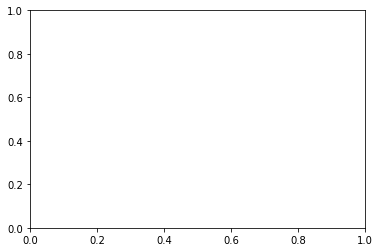

In [106]:
sns.regplot(x= 'sqft_basement', y= 'price', data=df_renovated)

### Yr_Built/Price Plot

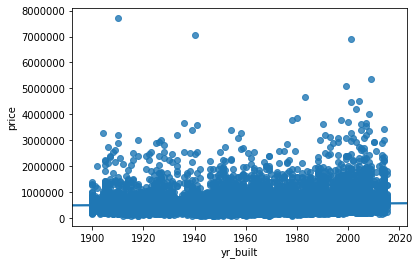

In [107]:
sns.regplot(x= 'yr_built', y= 'price', data=df_renovated)

### Yr_Renovated/Price Plot (Drop zeros/nulls)

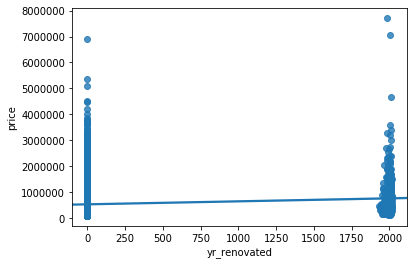

In [108]:
sns.regplot(x= 'yr_renovated', y= 'price', data=df_renovated)

### Zipcode/Price Plot (I know this isn't right)

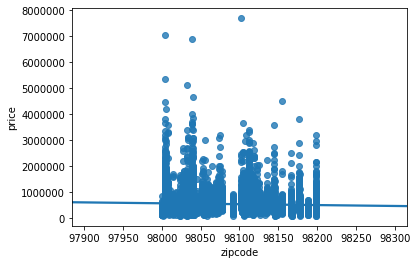

In [109]:
sns.regplot(x= 'zipcode', y= 'price', data=df_renovated)

### Lat/Price Plot

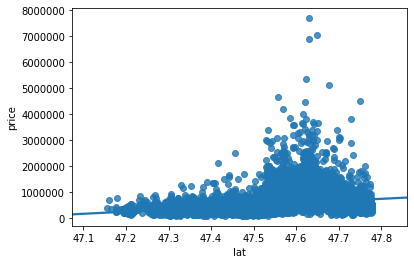

In [110]:
sns.regplot(x= 'lat', y= 'price', data=df_renovated)

### Long/Price Plot

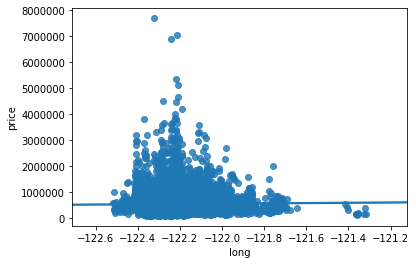

In [111]:
sns.regplot(x= 'long', y= 'price', data=df_renovated)

### SqFt_Living15/Price Plot

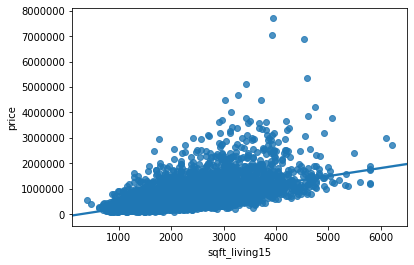

In [112]:
sns.regplot(x= 'sqft_living15', y= 'price', data=df_renovated)

### SqFt_Lot15/Price Plot

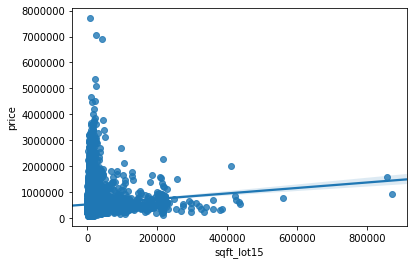

In [113]:
sns.regplot(x= 'sqft_lot15', y= 'price', data=df_renovated)

## Dataframe Info Recheck

In [114]:
df_renovated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null float64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null int32
zipcode          15762 non-null float64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(9), int32(1), int64(9), object(2)
memory usage: 2.6+ MB


## Still Need Help Here

In [ ]:
#Normalizing? Not Sure if Needed

#df_whatisthis = df_renovated.copy()
#df_whatisthis.columns = [col.replace(' ', '_') for col in df_whatisthis.columns]
#for col in x_cols:
#    df_whatisthis[col] = (df_whatisthis[col] - df_whatisthis[col].mean())/df_whatisthis[col].std()
#df_whatisthis.head()

# MODEL

## Initial Model on Price

In [124]:
outcome = 'price'
x_cols = ['bedrooms','bathrooms','floors','condition','grade','yr_built','yr_renovated','sqft_living', 'sqft_above']

In [125]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_renovated).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2843.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:39:06   Log-Likelihood:            -2.1694e+05
No. Observations:               15762   AIC:                         4.339e+05
Df Residuals:                   15752   BIC:                         4.340e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.813e+06   1.71e+05     39.869      0.000    6.48e+06    7.15e+06
bedrooms     -4.983e+04   2474.462    -20.139      0.000   -5.47e+04    -4.5e+04
bathrooms     5.018e+04   4356.115     11.520      0.000    4.16e+04    5.87e+04
floors        2.857e+04   4633.790      6.166      0.000    1.95e+04    3.77e+04
condition      1.98e+04   3104.271      6.378      0.000    1.37e+04    2.59e+04
grade         1.276e+05   2683.683     47.556      0.000    1.22e+05    1.33e+05
yr_built     -3906.2388     87.411    -44.688      0.000   -4077.575   -3734.902
yr_renovated    22.2676      4.900      4.544      0.000      12.662      31.873
sqft_living    206.5416      5.572     37.068      0.000     195.620     217.463
sqft_above     -17.4275      5.425     -3.213      0.001     -28.060      -6.795
==============================================================================
Omnibus:                    13052.927   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1019582.836
Skew:                           3.496   Prob(JB):                         0.00
Kurtosis:                      41.776   Cond. No.                     3.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Results

In [126]:
model.params.sort_values()

bedrooms       -4.983425e+04
yr_built       -3.906239e+03
sqft_above     -1.742748e+01
yr_renovated    2.226758e+01
sqft_living     2.065416e+02
condition       1.979945e+04
floors          2.857231e+04
bathrooms       5.018148e+04
grade           1.276243e+05
Intercept       6.813447e+06
dtype: float64

## Initial Trends
- Insert Here

## Refinement

### Normality

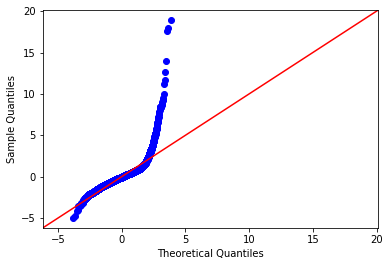

In [118]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Outliers Present
- Check Prices

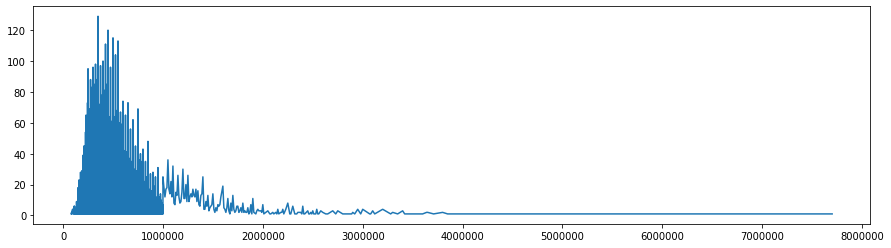

In [119]:
plt.figure(figsize=(15,4))
plt.plot(df_renovated['price'].value_counts().sort_index())

### Filter price - Attempt to Fix Normality
- Try to filter over $1,000,000

In [120]:
for i in range(90,100):
    q = i / 100
    print('{} percentile: {}'.format(q, df_renovated['price'].quantile(q=q)))

0.9 percentile: 888899.9999999997
0.91 percentile: 920000.0
0.92 percentile: 950116.1600000008
0.93 percentile: 995730.0000000014
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1270000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1983899.9999999942


### Homoscedasticity

In [127]:
plt.scatter(model.predict([x_cols]), model.resid)
plt.plot(model.predict([x_cols]), [0 for i in range(len(subset))])

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: TypeError: list indices must be integers or slices, not str
    price~bedrooms+bathrooms+floors+condition+grade+yr_built+yr_renovated+sqft_living+sqft_above
          ^^^^^^^^

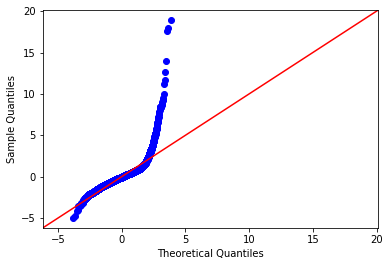

In [122]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Train Split Test

In [128]:
y = df_renovated[['price']]
X = df_renovated.drop(['price'], axis=1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12609 3153 12609 3153


In [131]:
print(X_train)

               id        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
21484  3438503021   11/5/2014         3       2.50         2430      7049   
9648   6818400110   12/3/2014         4       1.50         2040     10488   
13460  9331800580   3/10/2015         2       1.00         1000      3700   
13418  3735900325   4/27/2015         2       1.00         1080      4080   
11522  3365900520   6/18/2014         3       1.00         1080      8580   
...           ...         ...       ...        ...          ...       ...   
15553  5493110080   8/15/2014         3       3.75         6030     39317   
14400  7524950730   3/27/2015         4       2.25         2280      7229   
5632   7923600250   5/15/2015         5       2.00         1870      7344   
20886  7852120120   6/20/2014         3       3.50         3690      8837   
1186   6149700350  10/16/2014         2       1.00         1230      7560   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement

In [132]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

ValueError: could not convert string to float: '11/5/2014'

In [133]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

NameError: name 'y_hat_train' is not defined

In [134]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

NameError: name 'y_hat_train' is not defined

In [135]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

NameError: name 'y_hat_train' is not defined

In [136]:
linreg.score(X_test, y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Z - Score

In [137]:
z = np.abs(stats.zscore(df_renovated["price"]))
print(np.where(z > 3))

(array([   16,   112,   186,   211,   225,   233,   388,   403,   485,
         577,   600,   761,   860,   861,   905,   948,  1011,  1052,
        1065,  1076,  1228,  1267,  1291,  1425,  1426,  1526,  1567,
        1612,  1659,  1785,  1806,  1912,  2091,  2094,  2120,  2167,
        2200,  2348,  2388,  2433,  2463,  2558,  2717,  2726,  2733,
        2800,  2835,  2912,  2915,  2999,  3035,  3146,  3200,  3212,
        3253,  3374,  3465,  3501,  3542,  3593,  3960,  3974,  3976,
        4071,  4077,  4152,  4233,  4234,  4272,  4335,  4389,  4493,
        4521,  4600,  4650,  4726,  4732,  4869,  4886,  4905,  4927,
        4937,  4945,  5093,  5117,  5184,  5236,  5287,  5331,  5333,
        5386,  5404,  5419,  5473,  5528,  5579,  5762,  5813,  5855,
        5888,  5989,  6067,  6285,  6398,  6496,  6688,  6748,  6749,
        6802,  6895,  6922,  6984,  7060,  7179,  7211,  7353,  7572,
        7626,  7641,  7643,  7687,  7695,  7898,  7966,  8085,  8111,
        8205,  8212

In [138]:
df_renovated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125.0,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074.0,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0,98053.0,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0,98003.0,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0,98116.0,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0,98103.0,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0,98146.0,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0,98144.0,47.5944,-122.299,1020,2007


# Interpret

In [ ]:
model.summary()

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_renovated = df_renovated.sort_values('coef', ascending=False)
df_renovated.head(15)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='grade', y='price', data=df_renovated)
ax.set(title='Grade relationship on Price', 
       xlabel='Grade', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='bathrooms', y='price', data=df_renovated)
ax.set(title='Bathrooms & Price', 
       xlabel='Bathrooms', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='bedrooms', y='price', data=df_renovated)
ax.set(title='Bedrooms & Price', 
       xlabel='Bedrooms', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='floors', y='price', data=df_renovated)
ax.set(title='Floors & Price', 
       xlabel='Floors', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='condition', y='price', data=df_renovated)
ax.set(title='Condition & Price', 
       xlabel='Condition', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(x='sqft_living', y='price', data=df_renovated)
ax.set(title='Square Feet Living Space & Price', 
       xlabel='SqFt.', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(x='sqft_above', y='price', data=df_renovated)
ax.set(title='Square Feet Above & Price', 
       xlabel='Sqft. Above', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='yr_built', y='price', data=df_renovated)
ax.set(title='Year Built & Price', 
       xlabel='Year Built', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='yr_renovated', y='price', data=df_renovated)
ax.set(title='Year Renovated & Price', 
       xlabel='Year', ylabel='Price')

fig.tight_layout()

# Conclusions & Recommendations